# 중앙정부 부처에 대한 연구

목차:

**[I. 데이터 불러오기](#one)**

**[II. EDA ](#two)**
III
- [a. 결측치확인](#two-a)
- [b. 타겟변수](#two-b)
- [c. 지표비교](#two-c)
- [d. 파생변수추가](#two-d)

**[III. 모델링](#three)**
- [a. K-fold](#three-a)
- [b. LightGBM](#three-b)
- [c. RandomForest](#three-c)
- [d. Xgboost](#three-d)
- [e. 앙상블](#three-e)

**[V. 결과](#five)**

## I. 데이터 불러오기 <a id="one"></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#경고무시 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

지정된 경로를 찾을 수 없습니다.


In [6]:
df_20 = pd.read_excel('총합_2020.xlsx', header=1)

In [4]:
df_20.head()

,yearid,id,ara,ps1,ps2,ps3,ps4,ps5,ps6,ps7,ps8,ps9,ps10,ps11,ps12,ps13,ps14,cf1,cf2,cf3,cf4,cf5,cf6,cf7,cf8,sc1,sc2,sc3,sc4,sc5,sc6,sc7,si1,si2,si3,si4,si5,si6,si7,si8,si9,si10,cs1,cs2,cs3,cs4,cg1,cg2,cg3,cg4,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr8,fr9,fr10,fr11,tr
0,20201,1,11,8,2,2,7,2,5,3,3,1,1,5,4,3,2,3,4,3,4,3,3,3,3,1,1,1,4,1,1,5,2,2,2,6,2,2,2,2,2,2,3,3,2,2,3,1,2,2,3,3,3,2,3,3,2,3,2,3,2,3
1,20204,4,11,7,1,1,6,7,5,3,3,2,2,3,3,3,3,3,3,3,2,3,2,2,3,1,1,1,5,1,1,4,1,1,1,6,2,2,2,2,2,2,4,3,2,2,3,1,2,2,3,2,3,3,2,3,3,3,2,3,3,3
2,20205,5,11,8,1,1,7,7,5,3,3,1,1,3,4,3,2,3,2,3,3,2,3,2,2,1,1,4,1,1,1,4,2,2,2,7,2,2,2,2,2,2,4,3,1,1,3,1,2,2,3,2,3,2,3,2,2,3,2,3,3,3
3,20206,6,11,7,1,1,5,5,5,3,2,2,2,6,4,3,2,3,3,3,2,2,3,2,3,1,1,1,1,1,1,5,2,2,2,6,2,2,2,2,2,2,4,3,1,2,3,1,2,2,3,3,3,3,3,2,2,2,2,3,2,3
4,20207,7,11,7,1,1,6,6,5,3,3,1,1,3,4,2,2,3,4,3,4,4,3,4,3,1,1,1,1,1,1,5,2,2,2,6,2,2,2,2,2,2,4,3,2,2,2,1,2,2,3,3,3,4,2,2,2,3,2,2,3,2


In [5]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   yearid  8336 non-null   int64
 1   id      8336 non-null   int64
 2   ara     8336 non-null   int64
 3   ps1     8336 non-null   int64
 4   ps2     8336 non-null   int64
 5   ps3     8336 non-null   int64
 6   ps4     8336 non-null   int64
 7   ps5     8336 non-null   int64
 8   ps6     8336 non-null   int64
 9   ps7     8336 non-null   int64
 10  ps8     8336 non-null   int64
 11  ps9     8336 non-null   int64
 12  ps10    8336 non-null   int64
 13  ps11    8336 non-null   int64
 14  ps12    8336 non-null   int64
 15  ps13    8336 non-null   int64
 16  ps14    8336 non-null   int64
 17  cf1     8336 non-null   int64
 18  cf2     8336 non-null   int64
 19  cf3     8336 non-null   int64
 20  cf4     8336 non-null   int64
 21  cf5     8336 non-null   int64
 22  cf6     8336 non-null   int64
 23  cf7     8336 

In [6]:
df_20.describe()

,yearid,id,ara,ps1,ps2,ps3,ps4,ps5,ps6,ps7,ps8,ps9,ps10,ps11,ps12,ps13,ps14,cf1,cf2,cf3,cf4,cf5,cf6,cf7,cf8,sc1,sc2,sc3,sc4,sc5,sc6,sc7,si1,si2,si3,si4,si5,si6,si7,si8,si9,si10,cs1,cs2,cs3,cs4,cg1,cg2,cg3,cg4,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr8,fr9,fr10,fr11,tr
count,8.336000e+03,8336.000000,8336.000000,8336.000000,8336.000000,8336.00000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000
mean,1.827738e+07,4553.308541,28.089371,6.453455,3.883277,3.18858,6.052903,6.084573,5.202735,3.073057,2.893474,2.584333,2.648752,4.407989,4.426583,2.315379,2.455134,2.992682,3.272793,2.866723,2.715211,2.836732,2.664587,2.492562,2.619962,1.154990,1.206814,1.649352,1.708733,1.136996,1.428383,2.245561,1.445897,2.048105,1.910749,4.815259,1.990763,1.969290,1.954415,1.978767,1.964131,1.965091,3.269914,2.790547,2.437140,2.390715,2.313220,2.003719,2.340211,2.311180,2.803143,2.456214,2.535749,2.582414,2.484765,2.434741,2.300384,2.586012,2.365523,2.392035,2.388556,2.424664
std,5.632002e+06,2612.523787,8.293929,1.613602,2.133275,2.07379,1.582435,1.612317,1.579236,0.634019,0.717709,0.778283,0.787237,1.992892,1.787616,0.691006,0.698891,0.664513,0.764044,0.684118,0.712887,0.724314,0.714423,0.725534,0.707831,0.587385,0.694261,1.206265,1.189577,0.601692,0.957228,1.404950,0.497094,0.682431,0.629184,1.703009,0.095670,0.172542,0.208597,0.144170,0.185973,0.183560,0.638374,0.698640,0.774756,0.737255,0.730449,0.765708,0.723847,0.695585,0.621545,0.739657,0.725187,0.715865,0.713068,0.713441,0.730667,0.663590,0.712495,0.687957,0.678619,0.709071
min,2.020100e+04,1.000000,11.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.020227e+07,2272.750000,23.000000,5.000000,2.000000,2.00000,5.000000,5.000000,4.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.020456e+07,4562.500000,31.000000,7.000000,4.000000,3.00000,6.000000,6.000000,5.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000
75%,2.020684e+07,6842.250000,35.000000,8.000000,5.000000,5.00000,7.000000,7.000000,6.000000,3.000000,3.000000,3.000000,3.000000,6.000000,6.000000,3.00

In [7]:
print("df_20 data size : {}".format(df_20.shape))

df_20 data size : (8336, 62)


## II. EDA <a id="two"></a>

### a. 결측치 확인 <a id="two-a"></a>

In [7]:
#결측치 확인
print(df_20.isnull().sum().sum())

0


### b. target 변수 확인 <a id="two-b"></a>

Text(0.5, 1.0, '2020_중앙정부 부처에 대한 신뢰')

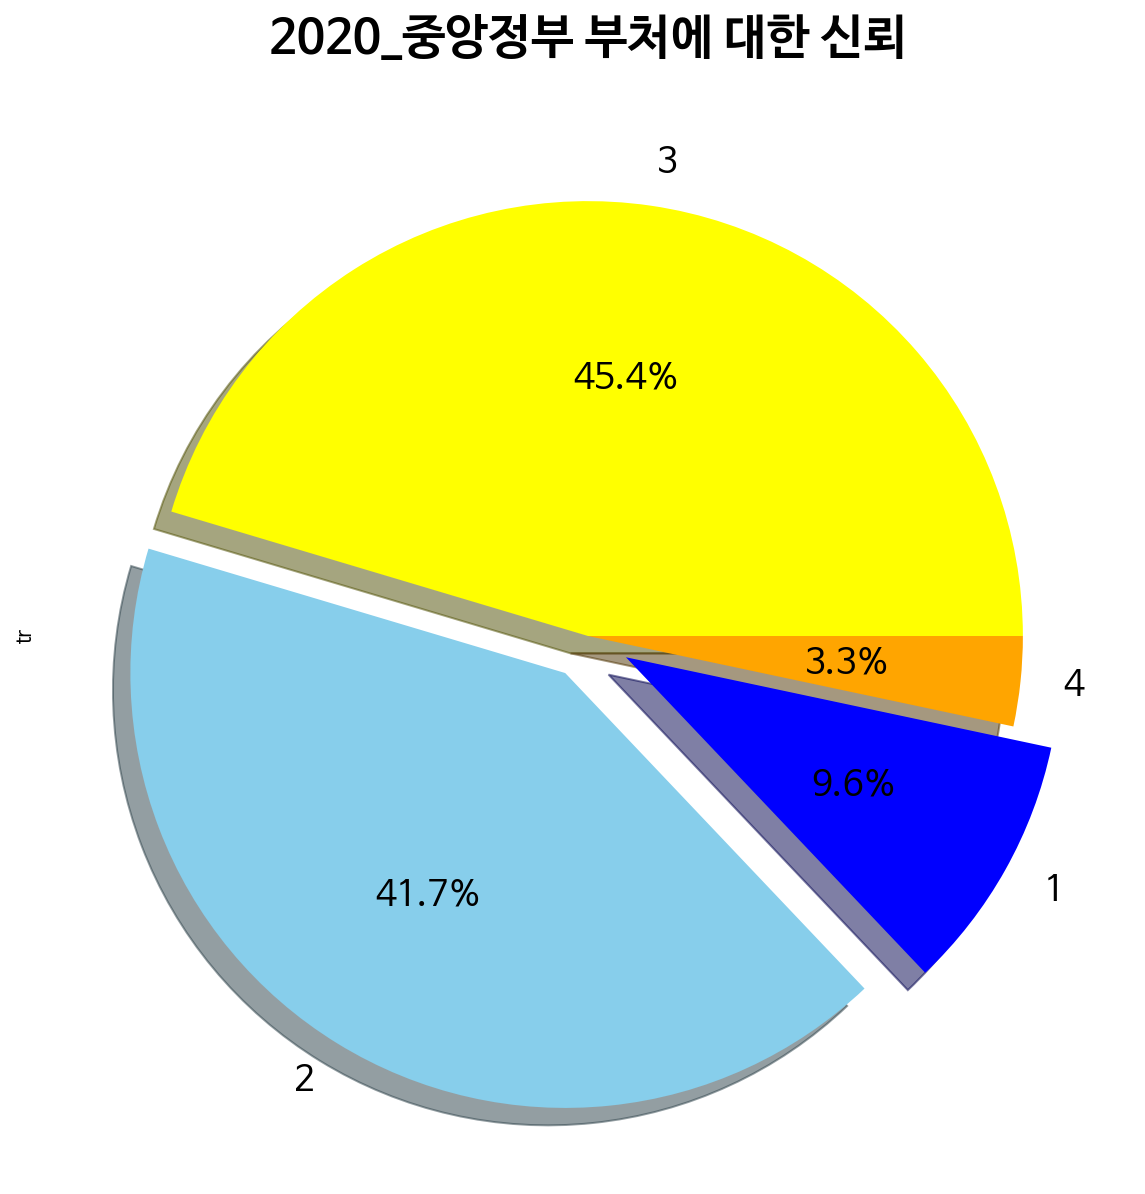

In [9]:
target_20 = df_20['tr']

plt.rcParams["figure.figsize"] = (10,10)
df_20.tr.value_counts().\
    plot.pie(explode = [0,0.1,0.1,0], shadow=True, autopct='%1.1f%%', 
             colors = ['yellow','skyblue','blue','orange'],
             textprops={'fontsize': 18})
plt.xticks(size=10)
title_font = {
    'fontsize': 24,
    'fontweight': 'bold'
}
plt.title('2020_중앙정부 부처에 대한 신뢰', fontdict=title_font, pad=20)

### c. 상관계수 확인 <a id="two-c"></a>

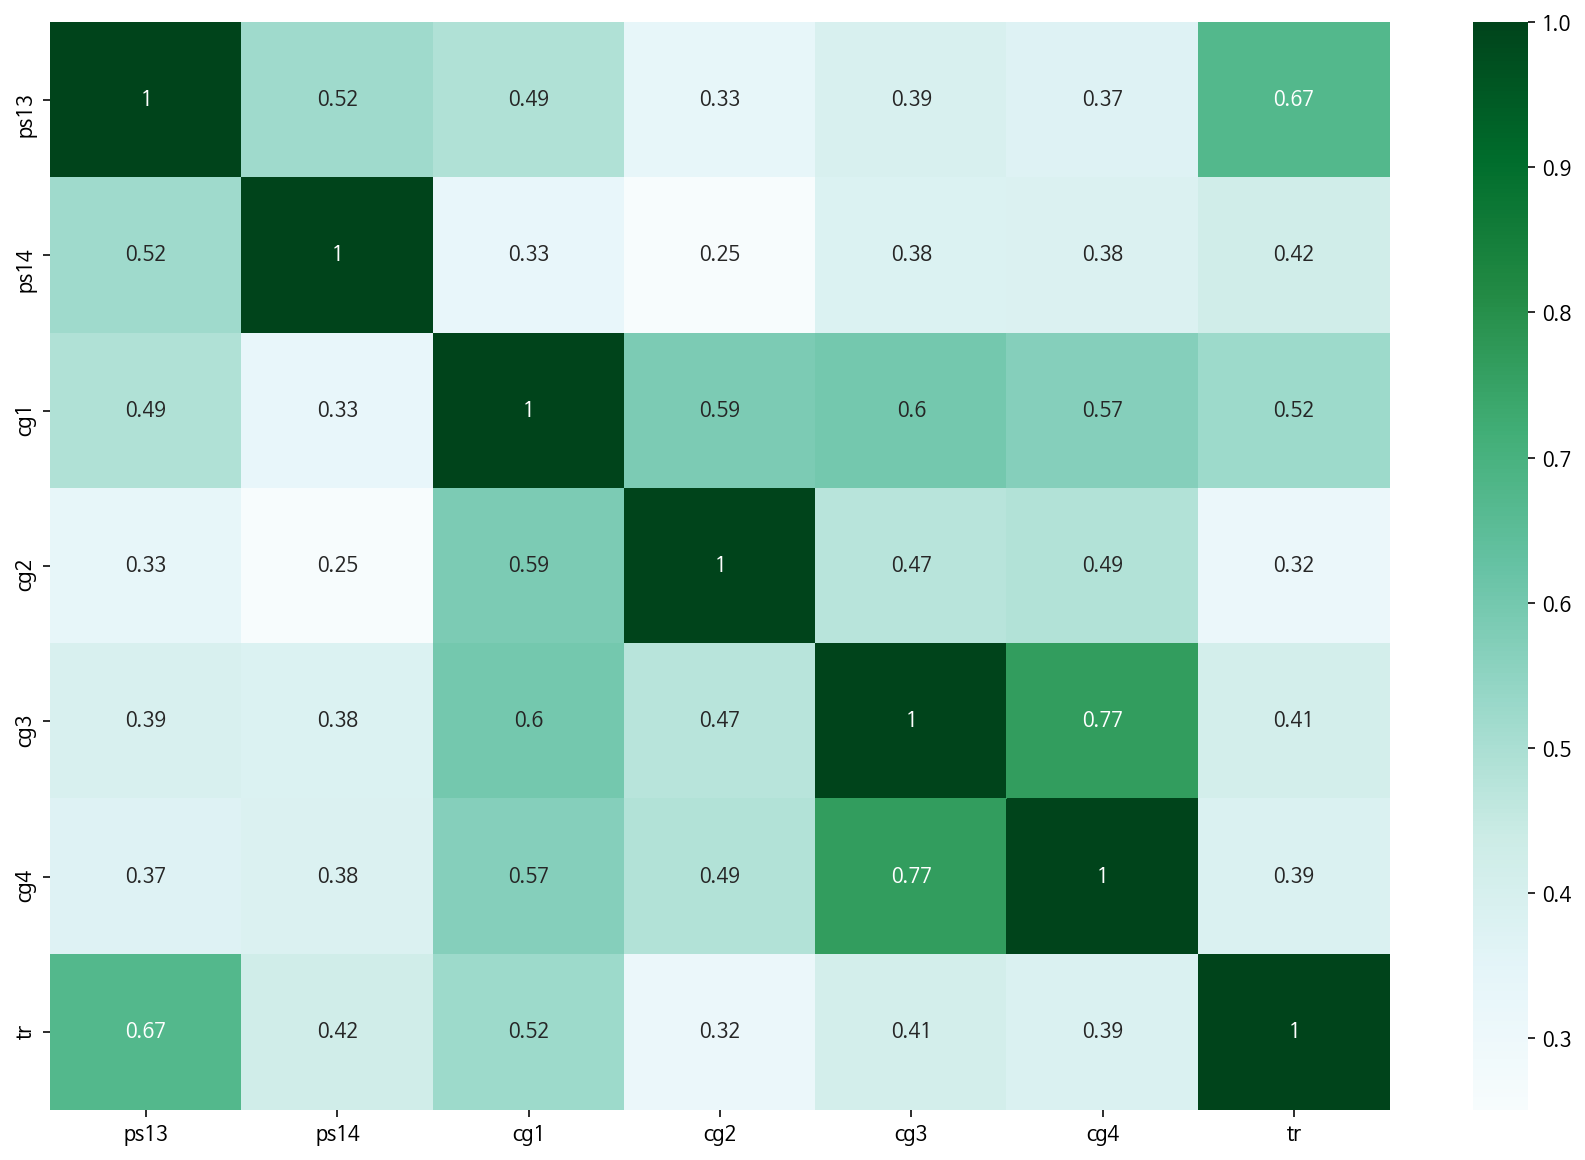

In [10]:
# 타겟변수와의 상관계수가 0.3이상인것 히트맵 확인
cor = df_20.corr()
cor_fe = cor.index[abs(cor['tr']) >= 0.3]
plt.figure(figsize=(15,10))
sns.heatmap(df_20[cor_fe].corr(),annot=True,cmap="BuGn")

In [11]:
# 상관계수 표로 정리
df_20[cor_fe].corr()

,ps13,ps14,cg1,cg2,cg3,cg4,tr
ps13,1.000000,0.521566,0.489785,0.333375,0.391359,0.371147,0.673265
ps14,0.521566,1.000000,0.332227,0.250399,0.379510,0.383118,0.424843
cg1,0.489785,0.332227,1.000000,0.585023,0.601478,0.568961,0.524250
cg2,0.333375,0.250399,0.585023,1.000000,0.474153,0.487313,0.315073
cg3,0.391359,0.379510,0.601478,0.474153,1.000000,0.765013,0.414363
cg4,0.371147,0.383118,0.568961,0.487313,0.765013,1.000000,0.385655
tr,0.673265,0.424843,0.524250,0.315073,0.414363,0.385655,1.000000


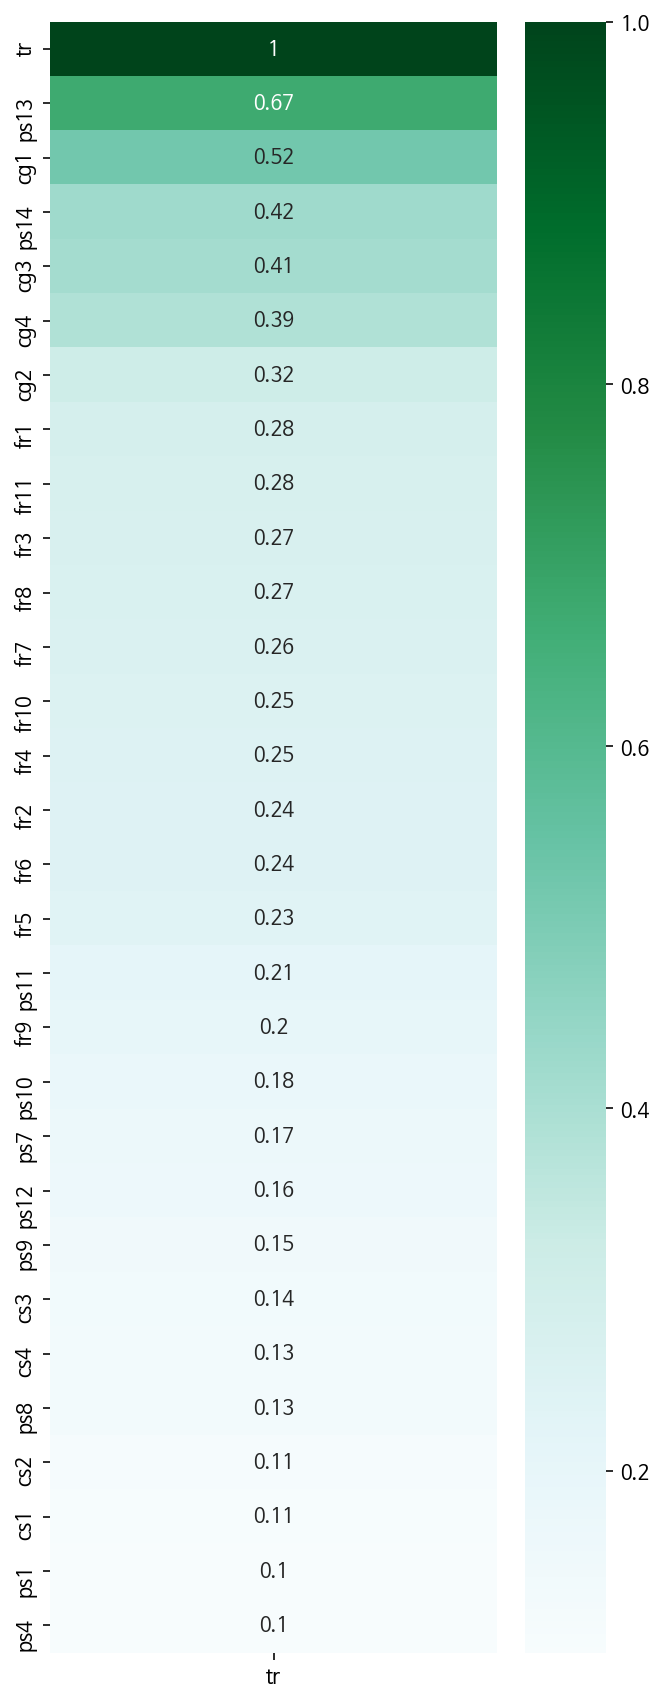

In [13]:
# 타겟변수와의 상관계수 정렬 상위 30개 
new_train_20 = df_20.copy()
corr_new_train_20 = new_train_20.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr_new_train_20[['tr']].sort_values(by=['tr'],ascending=False).head(30),annot=True,cmap="BuGn")

In [14]:
# 데이터 모델링을 위한 불필요한 변수 및 타겟변수 제거 
df_20 = df_20.drop(columns = ['yearid', 'id', 'ara','tr'])

## 범주형 변수 확인

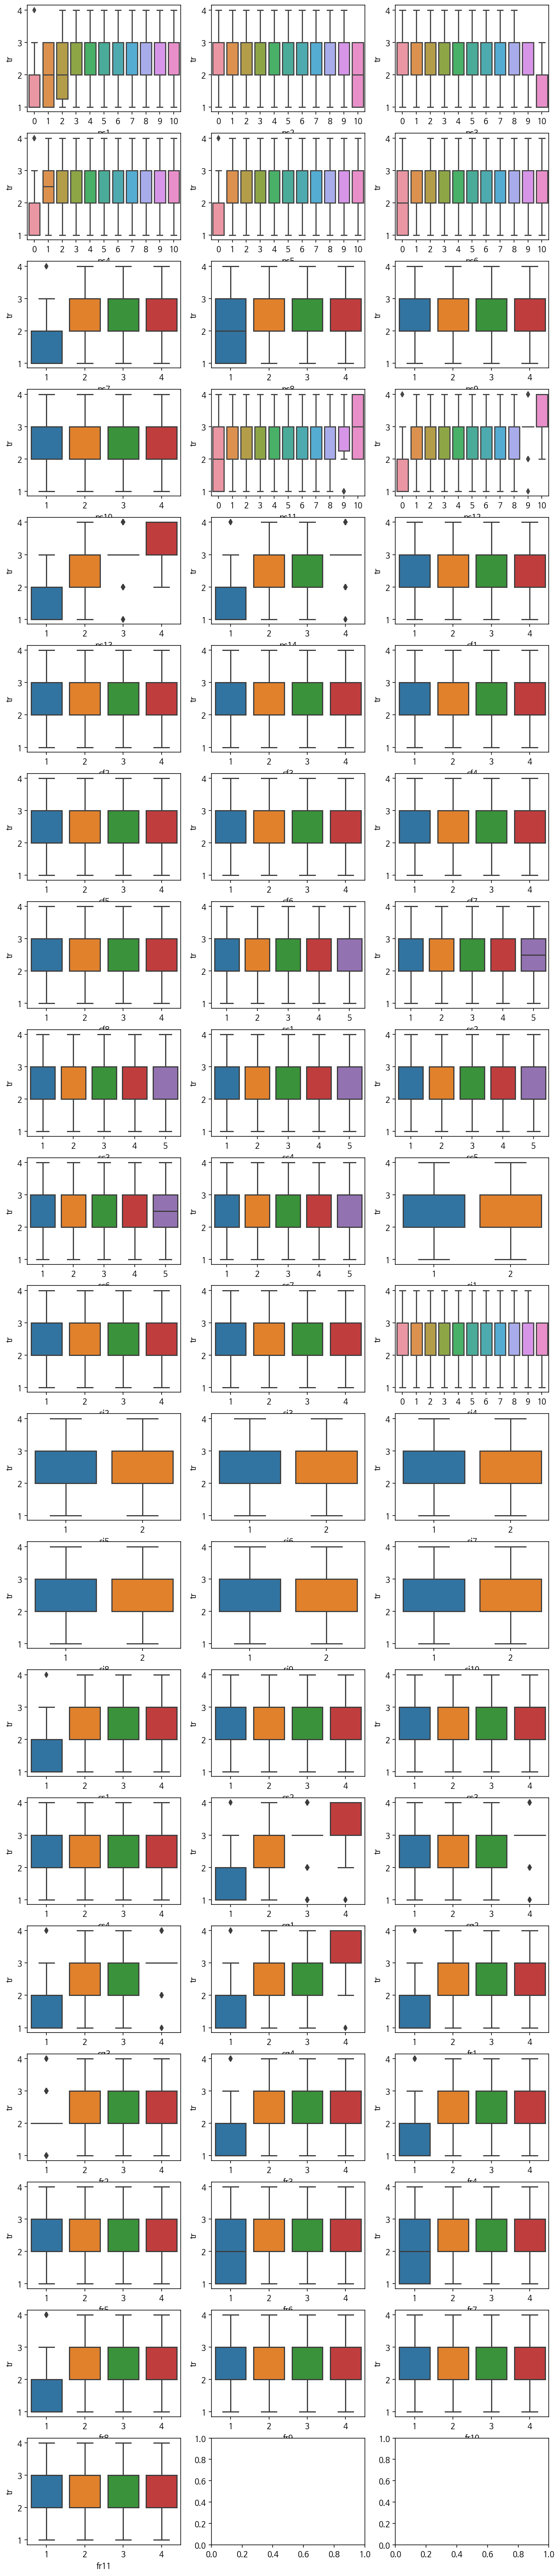

In [15]:
# 이 경우 int타입을 obj로 변환해서 비교해보는것도
li_num_20  = list(df_20.columns)

row = 20
col = 3 

fig, axs = plt.subplots(row,col, figsize = (col*4,row*3))

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(li_num_20):
            sns.boxplot(df_20[li_num_20[i]],target_20 , ax = axs[r][c])

## III. 모델링  <a id="three"></a>

### a.K-fold <a id="three-a"></a>

In [16]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split

from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.utils.class_weight import compute_sample_weight
from sklearn.utils import class_weight
from sklearn.ensemble import VotingClassifier
from scipy.stats import randint as sp_randint
import xgboost as xgb
#import eli5 
#from eli5.sklearn import PermutationImportance

In [17]:
# 10개의 StratifiedKFold
kfold = StratifiedKFold(n_splits=10)

In [18]:
random_state = 1
clf = []

clf.append(XGBClassifier(random_state = random_state))
clf.append(LGBMClassifier(random_state = random_state))
clf.append(KNeighborsClassifier())
clf.append(RandomForestClassifier(random_state=random_state))
clf.append(GradientBoostingClassifier(random_state=random_state))
clf.append(DecisionTreeClassifier(random_state=random_state))
clf.append(LogisticRegression(random_state = random_state))
clf.append(SVC(random_state=random_state))

In [19]:
clf_results = []
for classifier in clf :
    clf_results.append(cross_val_score(classifier,df_20 , y = target_20, scoring = "f1_weighted", cv = kfold, n_jobs=4))

In [20]:
clf_means = []
clf_std = []
for clf_result in clf_results:
    clf_means.append(clf_result.mean())
    clf_std.append(clf_result.std())

In [21]:
clf_re = pd.DataFrame({"CrossValMeans":clf_means,"CrossValerrors": clf_std},
                     index=['XGB','LGB','KNeighbors','RF','GBC','DT','Logist','SVC'])
clf_re

,CrossValMeans,CrossValerrors
XGB,0.716541,0.014549
LGB,0.703914,0.018740
KNeighbors,0.577937,0.029397
RF,0.702801,0.019104
GBC,0.717033,0.015170
DT,0.606297,0.026698
Logist,0.701808,0.013680
SVC,0.698946,0.022706


<BarContainer object of 8 artists>

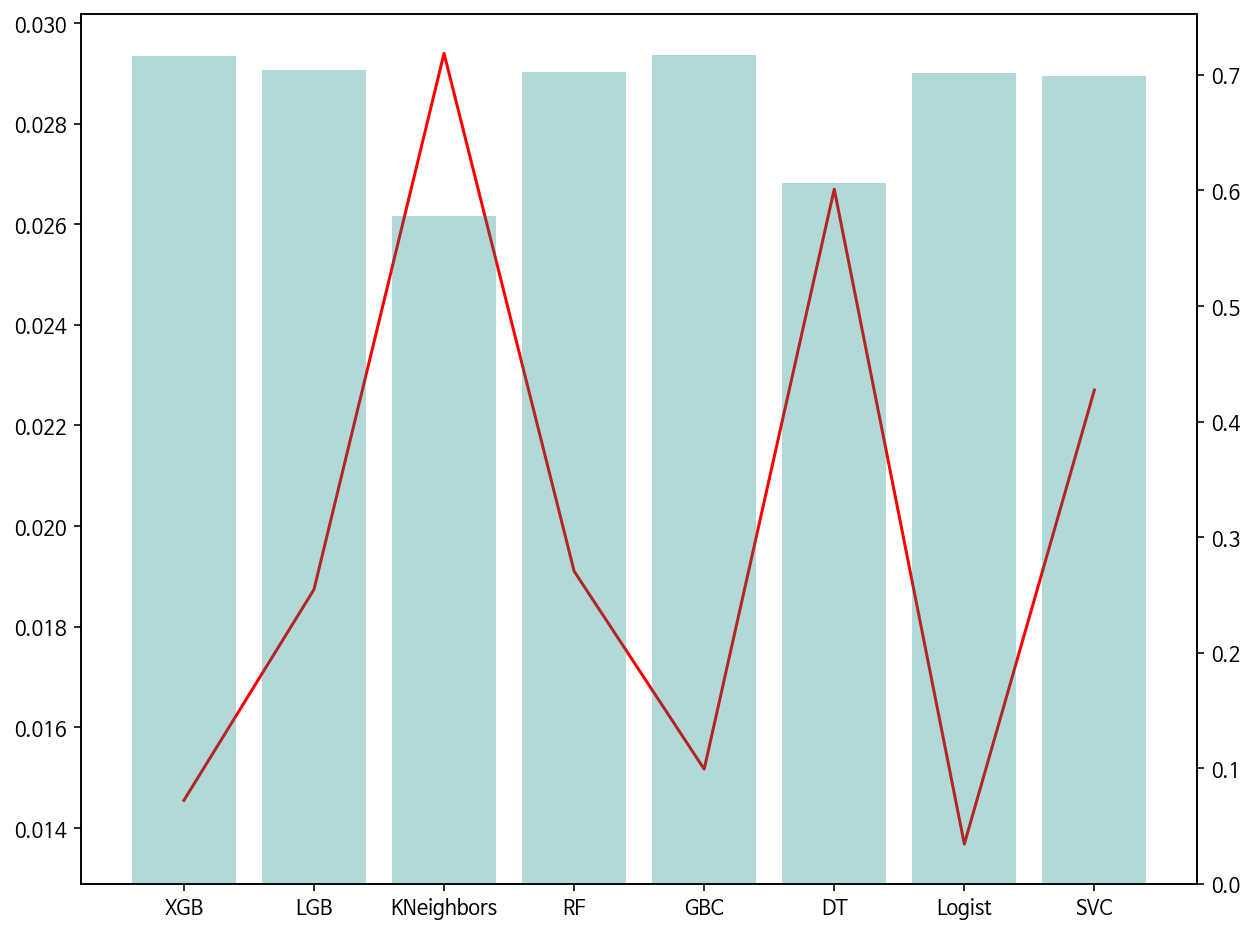

In [22]:
# Kfold 확인 결과 XGB,GBC,LGB,RF를 비교하려고 하였으나 모델 시간고려상 GBC는 제외 
# 다른 모델도 높게 나와서 조금더 정확하게 하려면 설문 문항이 카테고리 변수이므로 
# 원핫인코딩을 했다면 결과가 달랐을까? -단점, 원핫인코딩시 칼럼이 지금의 4~6배 많아지니 시간소요 커짐
fig, ax1 = plt.subplots(figsize = (10,8))
ax1.plot(clf_re['CrossValerrors'], color = 'r')

ax2 = ax1.twinx()
ax2.bar(clf_re.index, clf_re['CrossValMeans'], alpha = 0.3,color = 'teal')

### b.train_test_split <a id="three-b"></a>

In [23]:
# train_test_split, 검증이 아닌 X_val y_val를 test 데이터로 사용함 
X_train, X_val, y_train, y_val = train_test_split(df_20, target_20, test_size=0.3, shuffle=True)

In [29]:
# 컨퓨전매트릭스 모듈화
def cnf_matrix_model(model):
    cnf_matrix_gbc = confusion_matrix( y_val, model)
    g = sns.heatmap(pd.DataFrame(cnf_matrix_gbc), annot=True, cmap="BuGn", fmt='g')
    buttom , top = g.get_ylim()
    g.set_ylim(buttom+0.5, top-0.5)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    return g

In [30]:
# f1_score 확인 모듈화 
def four_f1(model_f1,model):
    print("F1 Cross_validate",model_f1)
    print("F1 Macro:",f1_score(y_val, model, average='macro'))
    print("F1 Micro:",f1_score(y_val, model, average='micro'))  
    print("F1 Weighted:",f1_score(y_val, model, average='weighted'))
    print("\nMatrix of confusion")
    return confusion_matrix(y_val, model)

### c.LightGBM <a id="four-c"></a>

In [73]:
# LGBM 파라미터 튜닝에 관해 아래와 같이 4가지만 하였고 시간단축을 위해 RandomizedSearchCV
# gridSearch로 진득하니 할 수 도 있었지만 시간고려
parametros_lgb = {
    'n_estimators': [400, 700, 1000], 
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4],
    }

model_lgb= LGBMClassifier(random_state=16)

In [74]:
# 파라미터 튜닝 36분 소요
lgb_random = RandomizedSearchCV(estimator = model_lgb, param_distributions = parametros_lgb, n_iter = 100, cv = kfold, 
                               verbose=2, random_state=16,scoring='f1_weighted')
lgb_random.fit(X_train,y_train)

# 최고의 파라미터 확인
# {'max_depth': 20, 'min_split_gain': 0.3, 'n_estimators': 400, 'num_leaves': 50}

lgb_random.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15 
[CV]  num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15, total=   2.9s
[CV] num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15, total=   2.9s
[CV] num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15 
[CV]  num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15, total=   2.8s
[CV] num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15 
[CV]  num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15, total=   2.8s
[CV] num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15 
[CV]  num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15, total=   2.8s
[CV] num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15 
[CV]  num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15, total=   2.9s
[CV] num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15 
[CV]  num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15, total=   2.9s
[CV] num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=15 
[CV]  num_leaves=50, n_estimators=400, min_spl

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 36.0min finished


{'max_depth': 20, 'min_split_gain': 0.3, 'n_estimators': 400, 'num_leaves': 50}

In [75]:
# 최고의 파라미터로 다시 학습 
model_lgbc = LGBMClassifier(**lgb_random.best_params_)
model_lgbc.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=20,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=400, n_jobs=-1, num_leaves=50, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [76]:
# test 예측 및 f1스코어 비교 
Predicted_lgbc = model_lgbc.predict(X_val)
lgbc_f1 = cross_val_score(model_lgbc, X_train, y_train, cv=kfold, scoring='f1_weighted').mean()

In [77]:
def four_f1(model_f1,model):
    print("F1 Cross_validate",model_f1)
    print("F1 Macro:",f1_score(y_val, model, average='macro'))
    print("F1 Micro:",f1_score(y_val, model, average='micro'))  
    print("F1 Weighted:",f1_score(y_val, model, average='weighted'))
    print("\nMatrix of confusion")
    return confusion_matrix(y_val, model)

In [78]:
four_f1(lgbc_f1,Predicted_lgbc)

F1 Cross_validate 0.7335899259073969
F1 Macro: 0.6081922270605942
F1 Micro: 0.7313074770091963
F1 Weighted: 0.7266505233450792

Matrix of confusion


array([[132,  96,  15,   0],
       [ 56, 784, 179,   0],
       [ 11, 232, 893,  20],
       [  0,   3,  60,  20]])

In [79]:
def cnf_matrix_model(model):
    cnf_matrix_gbc = confusion_matrix( y_val, model)
    g = sns.heatmap(pd.DataFrame(cnf_matrix_gbc), annot=True, cmap="BuGn", fmt='g')
    buttom , top = g.get_ylim()
    g.set_ylim(buttom+0.5, top-0.5)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    return g

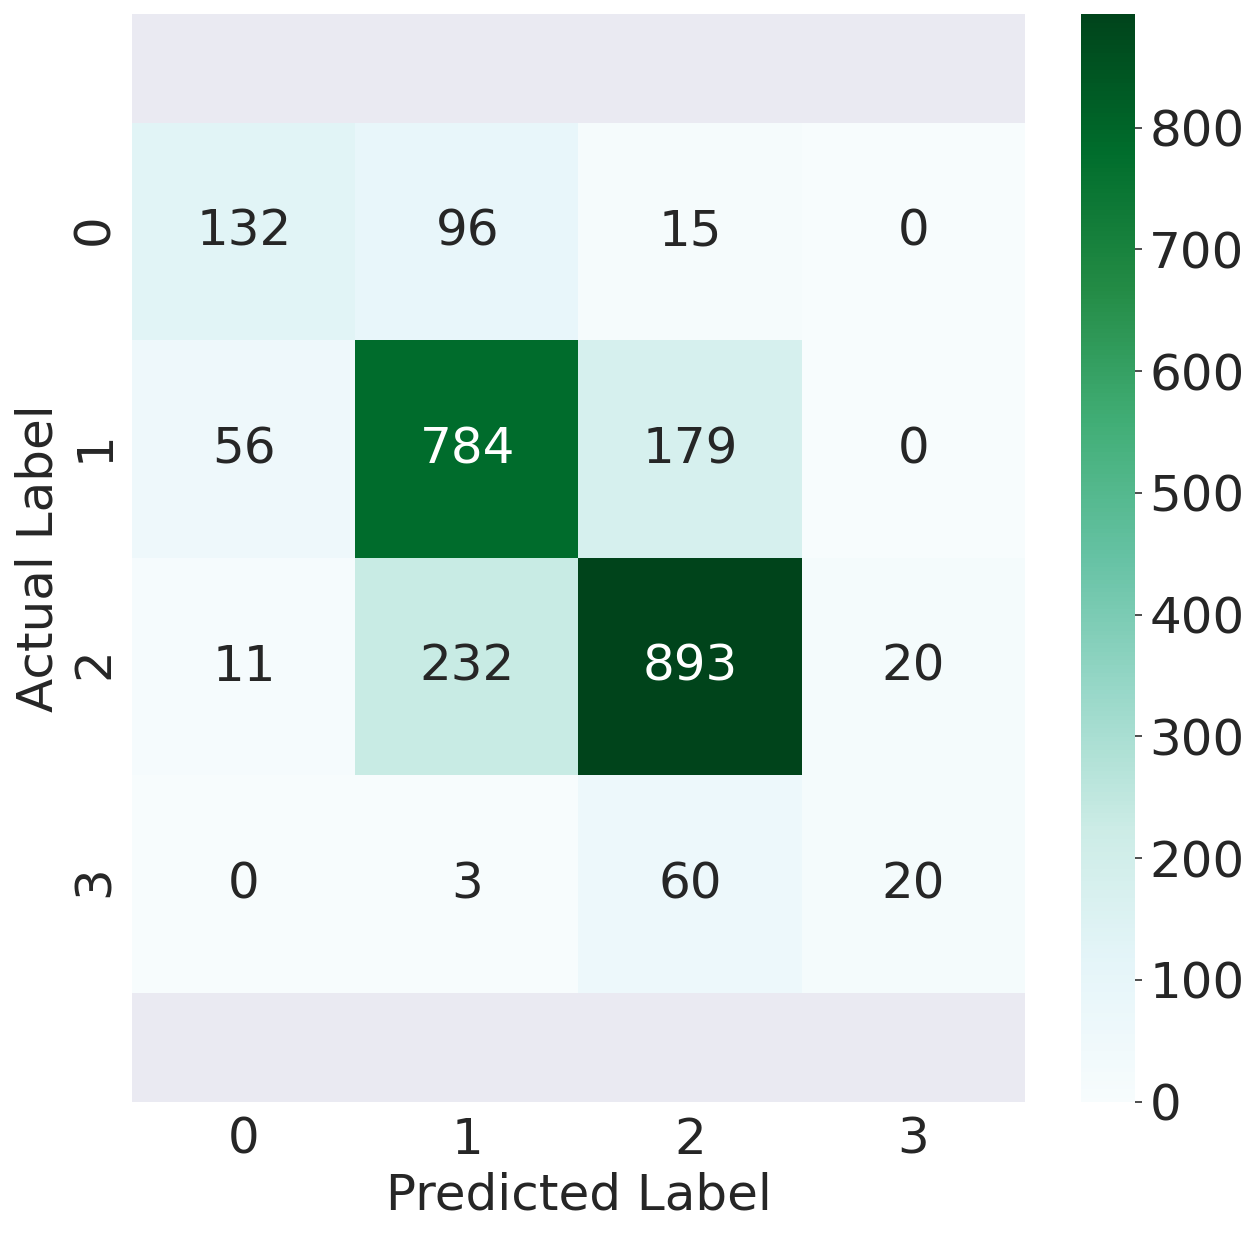

In [80]:
cnf_matrix_model(Predicted_lgbc)

In [89]:
# 모델링 결과를 pkl로 저장, 나중에 모델링 학습 시간 단축가능 
joblib.dump(model_lgbc,'lgb.pkl')

['lgb.pkl']

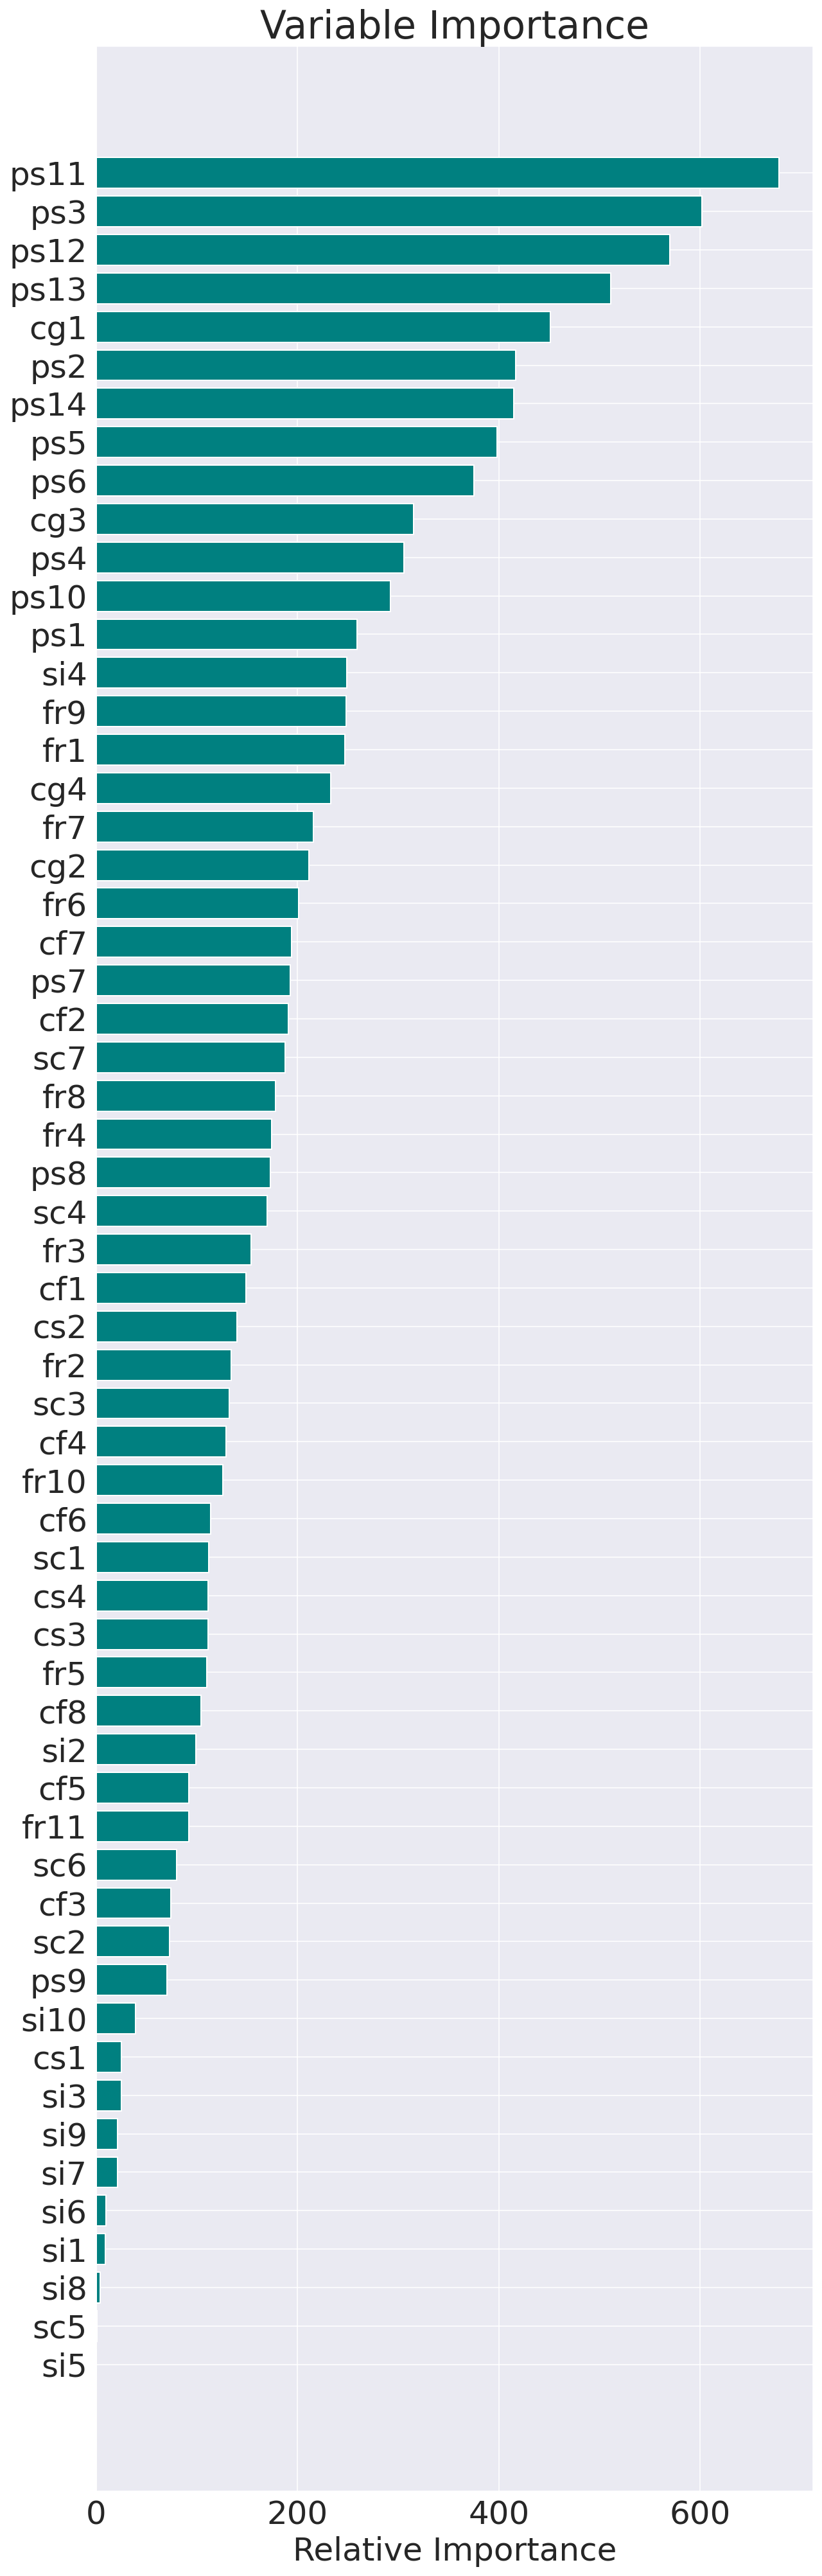

In [121]:
# 변수 중요도 코드
# lgb의 경우 아래 feature_importance가 x좌표값 이상? 코드의 문제인지? 아님 원래그런지?
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    sns.set_style('darkgrid')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    #feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.rc("font",family="Malgun Gothic")
    plt.rc("axes",unicode_minus=False)
    
    plt.barh(pos, feature_importance[sorted_idx], align='center',color = 'teal' )
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

plot_feature_importance(model_lgbc, X_train, (10, 35))

In [120]:
# 피처임포턴스 역순으로 큼 
feature_importance = model_lgbc.feature_importances_
a = pd.Series(feature_importance,X_train.columns).sort_values(ascending=True)
b = pd.DataFrame(a, columns= ['feature_importance']).tail(15)
b

,feature_importance
fr9,248
si4,249
ps1,259
ps10,292
ps4,306
cg3,315
ps6,375
ps5,398
ps14,415
ps2,417


Text(0.5, 1.0, 'feature_importance')

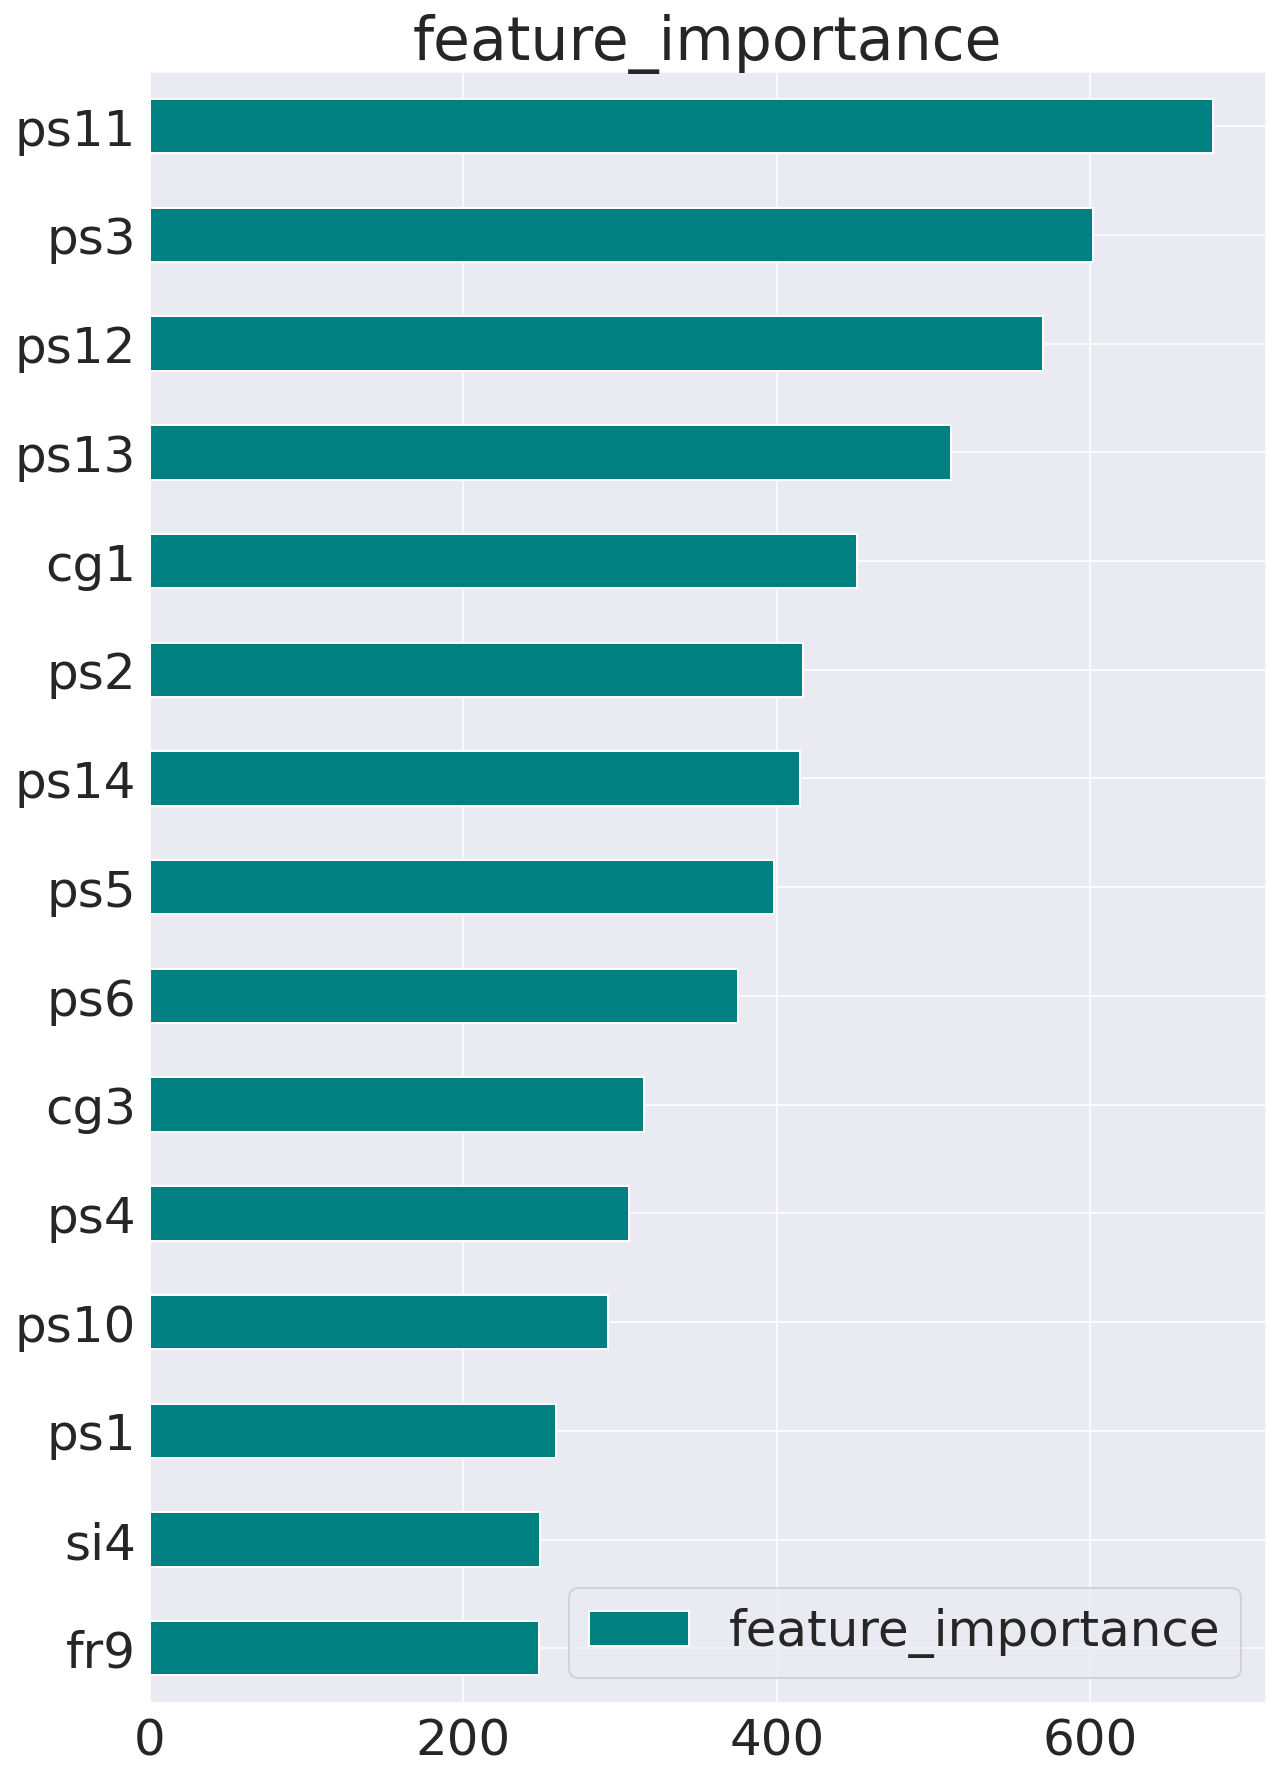

In [122]:
# 상위 15개만 보여줌 
bar_width = 0.35
plt.rc("font",family="Malgun Gothic",size=25)
plt.rc("axes",unicode_minus=False)
b.plot.barh(align='center',color = 'teal',figsize = (10,15))
plt.title('feature_importance', fontsize= 30)

### LightGBM voting

In [81]:
# random_state를 달리해서 10개로 보팅 
ets_lgbc = []    
for i in range(10):
    lgbc = LGBMClassifier(random_state=217+i,**lgb_random.best_params_)
    ets_lgbc.append(('lgbc{}'.format(i), lgbc))   

In [82]:
# y축 불균형에 관련하여 라이브러리 사용
y_train_weights = class_weight.compute_sample_weight('balanced', y_train, indices=None)

In [83]:
# 보팅 모델 만들어 학습 
vc2 = VotingClassifier(ets_lgbc, voting='soft')    
_ = vc2.fit(X_train,y_train,sample_weight=y_train_weights)    

In [84]:
lgbc_clf_final = vc2.estimators_[0]

In [85]:
# 보팅 모델 스코어 비교 / lgbc_global_score는 코딩오류가 있을것으로 보임??
lgbc_global_score = f1_score(y_val, lgbc_clf_final.predict(X_val), average='weighted')
vc2.voting = 'hard'
lgbc_global_score_hard = f1_score(y_val, vc2.predict(X_val), average='weighted')
vc2.voting = 'soft'
lgbc_global_score_soft = f1_score(y_val, vc2.predict(X_val),average='weighted')

In [86]:
print('Validation score of a single LGB Classifier: {:.4f}'.format(lgbc_global_score))
print('Validation score of a VotingClassifier on 3 LGB with hard voting strategy: {:.4f}'.format(lgbc_global_score_hard))
print('Validation score of a VotingClassifier on 3 LGB with soft voting strategy: {:.4f}'.format(lgbc_global_score_soft))

Validation score of a single LGB Classifier: 0.1094
Validation score of a VotingClassifier on 3 LGB with hard voting strategy: 0.7176
Validation score of a VotingClassifier on 3 LGB with soft voting strategy: 0.7176


f1  0.7175555514666233
              precision    recall  f1-score   support

           1       0.56      0.68      0.61       243
           2       0.70      0.73      0.72      1019
           3       0.79      0.73      0.76      1156
           4       0.41      0.41      0.41        83

    accuracy                           0.72      2501
   macro avg       0.62      0.64      0.63      2501
weighted avg       0.72      0.72      0.72      2501



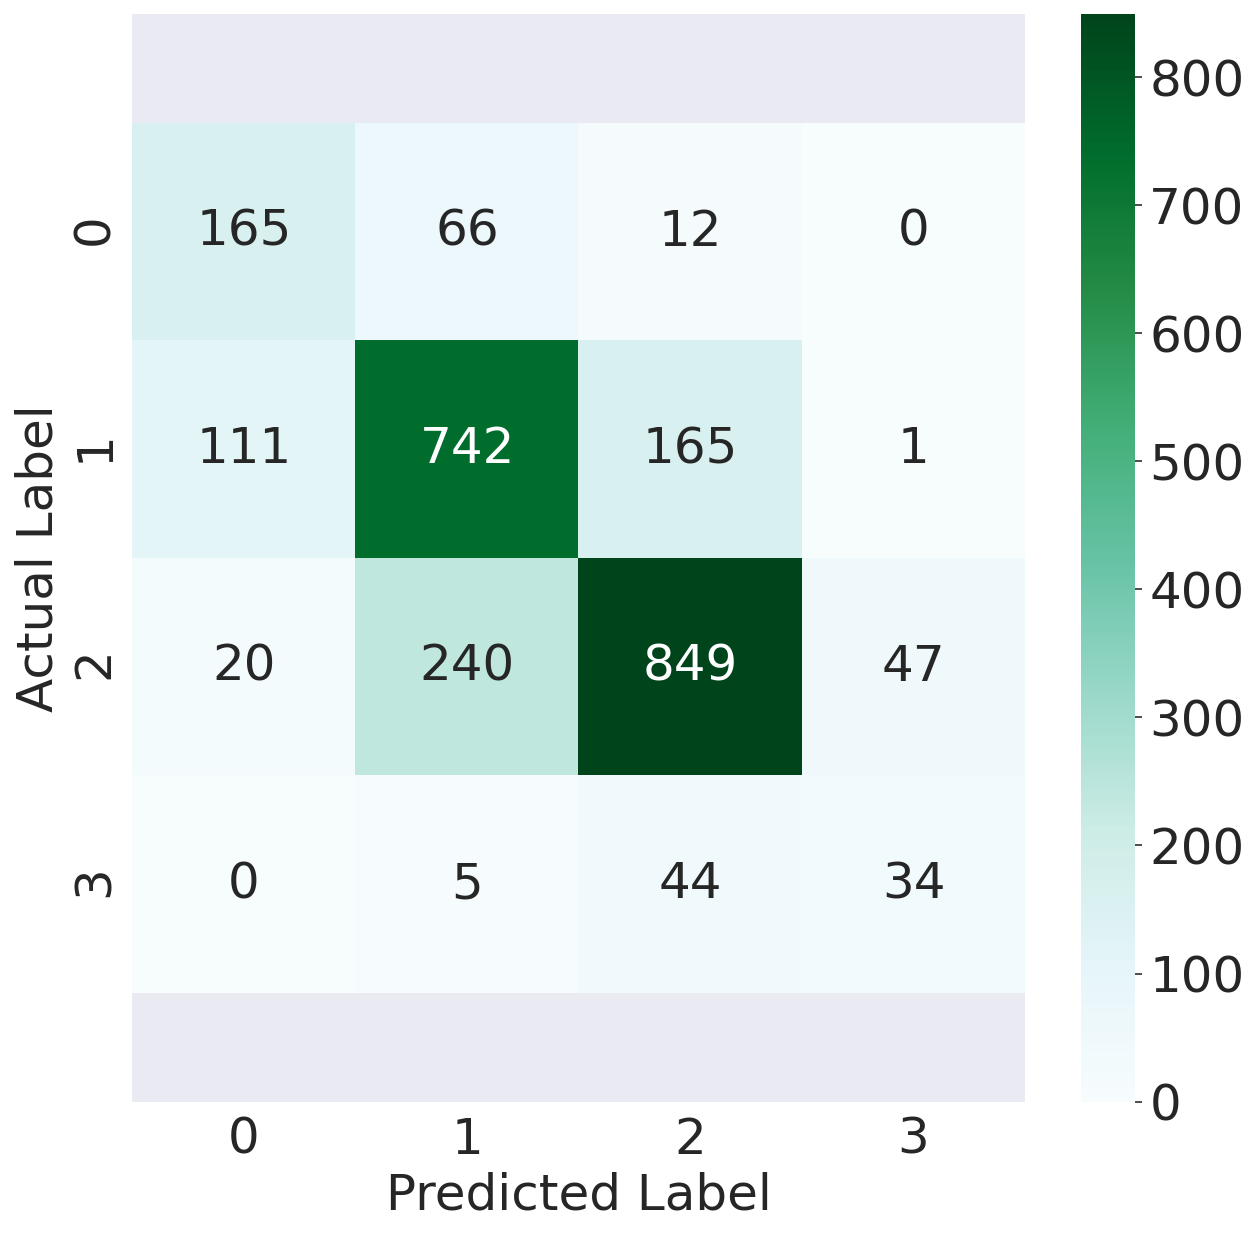

In [87]:
cnf_matrix_vgbc = confusion_matrix(y_val, vc2.predict(X_val))
g = sns.heatmap(pd.DataFrame(cnf_matrix_vgbc), annot=True, cmap="BuGn", fmt='g')
buttom , top = g.get_ylim()
g.set_ylim(buttom+0.5, top-0.5)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print('f1 ',f1_score(y_true=y_val, y_pred=vc2.predict(X_val), average='weighted'))
print(classification_report(y_val, vc2.predict(X_val)))

In [90]:
joblib.dump(vc2,'lgb_voting.pkl')

['lgb_voting.pkl']

### d.RandomForest <a id="four-d"></a>

In [24]:
# 파라미터 튜닝
parametros_rf = {"max_depth": [3, 5,10,20,None],
            'max_features': ['auto', 'sqrt'],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
             'n_estimators': [100,200,500,1000],
              "bootstrap": [True, False]
             }
model_rf= RandomForestClassifier(random_state=16)

In [25]:
# 32분 소요
# 최고의 파라미터 맨 아래 {'bootstrap': False, 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = parametros_rf, n_iter = 100, cv = kfold, 
                               verbose=2, random_state=16,n_jobs = -1, scoring='f1_weighted')
rf_random.fit(X_train,y_train)
rf_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 23.0min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 32.7min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [26]:
# 최고의 파라미터로 다시 학습
model_rf = RandomForestClassifier(**rf_random.best_params_)
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
# 예측 및 f1score 확인
Predicted_rf = model_rf.predict(X_val)
rf_f1 = cross_val_score(model_rf, X_train,y_train, cv=kfold, scoring='f1_weighted').mean()

In [32]:
four_f1(rf_f1,Predicted_rf)

F1 Cross_validate 0.7357582926160506
F1 Macro: 0.5849438470575372
F1 Micro: 0.7357057177129148
F1 Weighted: 0.7270590096713749

Matrix of confusion


array([[120, 108,  15,   0],
       [ 39, 806, 174,   0],
       [  4, 240, 902,  10],
       [  0,   4,  67,  12]])

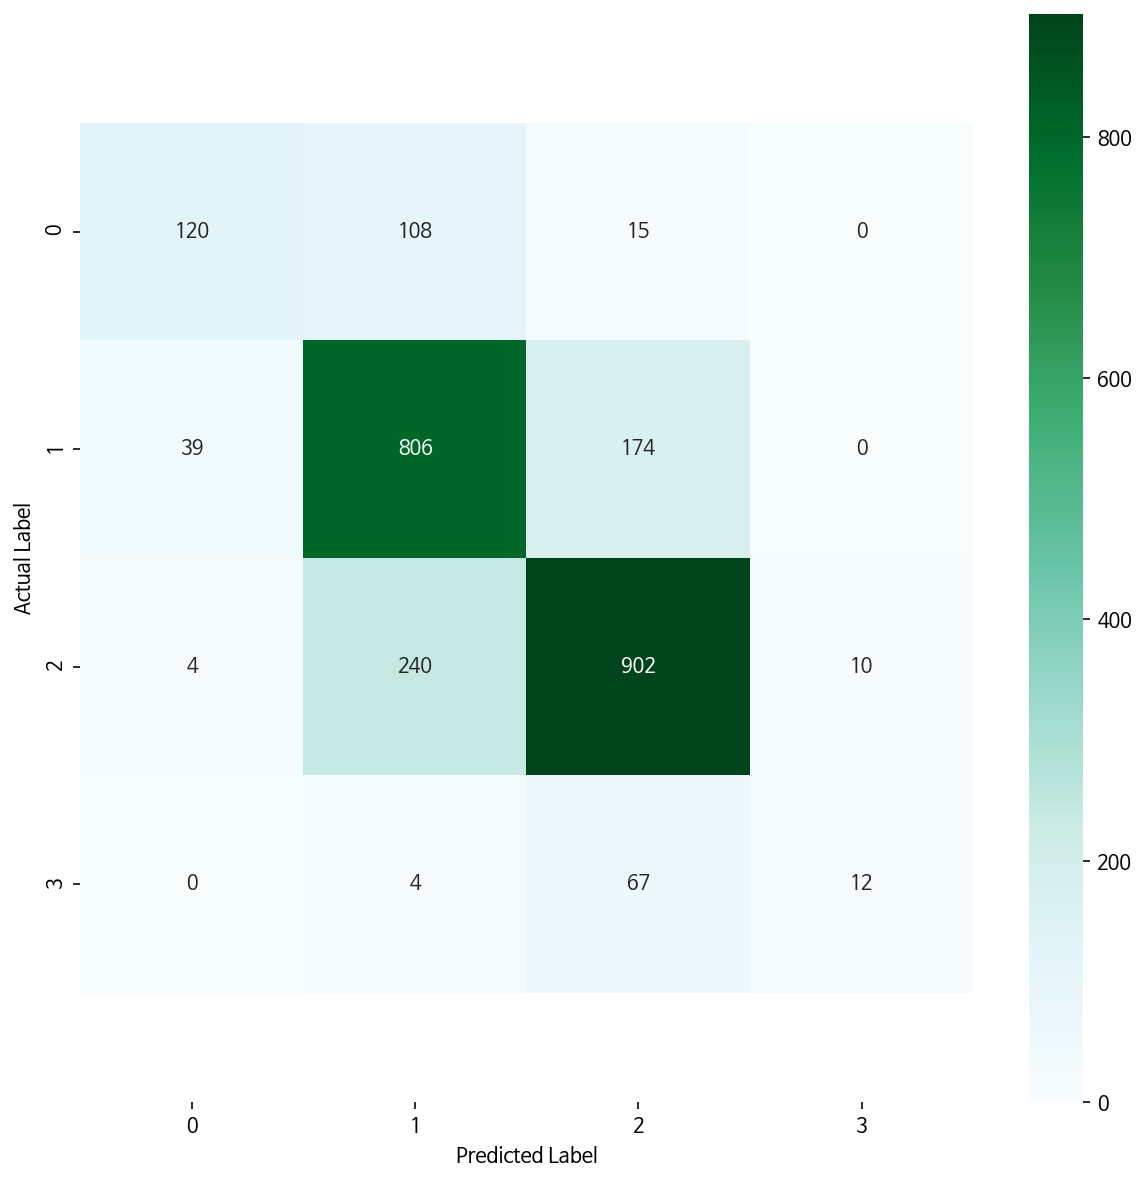

In [33]:
cnf_matrix_model(Predicted_rf)

In [34]:
import joblib
joblib.dump(model_rf,'rf.pkl')

['rf.pkl']

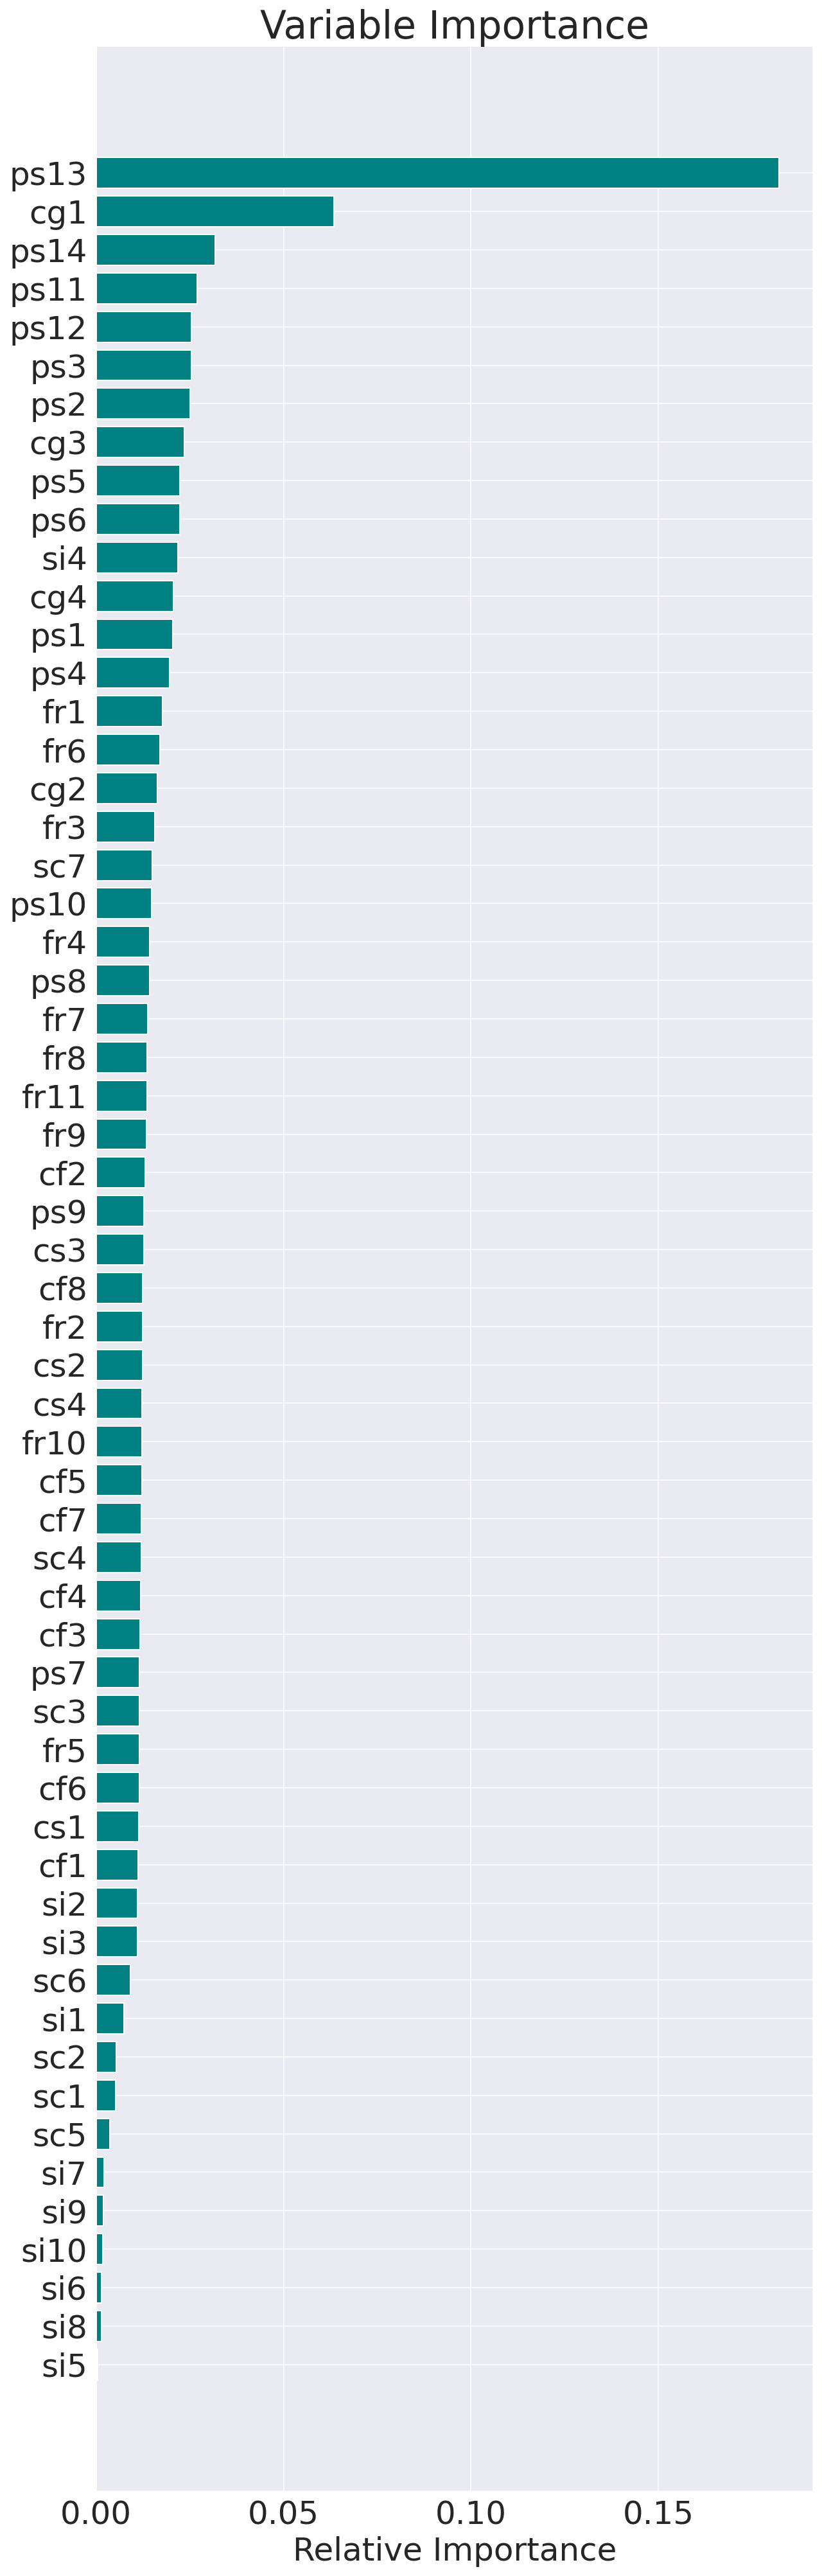

In [123]:
plot_feature_importance(model_rf, X_train, (10, 35))

In [126]:
feature_importance = model_rf.feature_importances_
a = pd.Series(feature_importance,X_train.columns).sort_values(ascending=True)
b = pd.DataFrame(a, columns= ['feature_importance']).tail(15)
b

,feature_importance
fr1,0.017657
ps4,0.019623
ps1,0.020448
cg4,0.020560
si4,0.021806
ps6,0.022318
ps5,0.022351
cg3,0.023479
ps2,0.025050
ps3,0.025354


Text(0.5, 1.0, 'feature_importance')

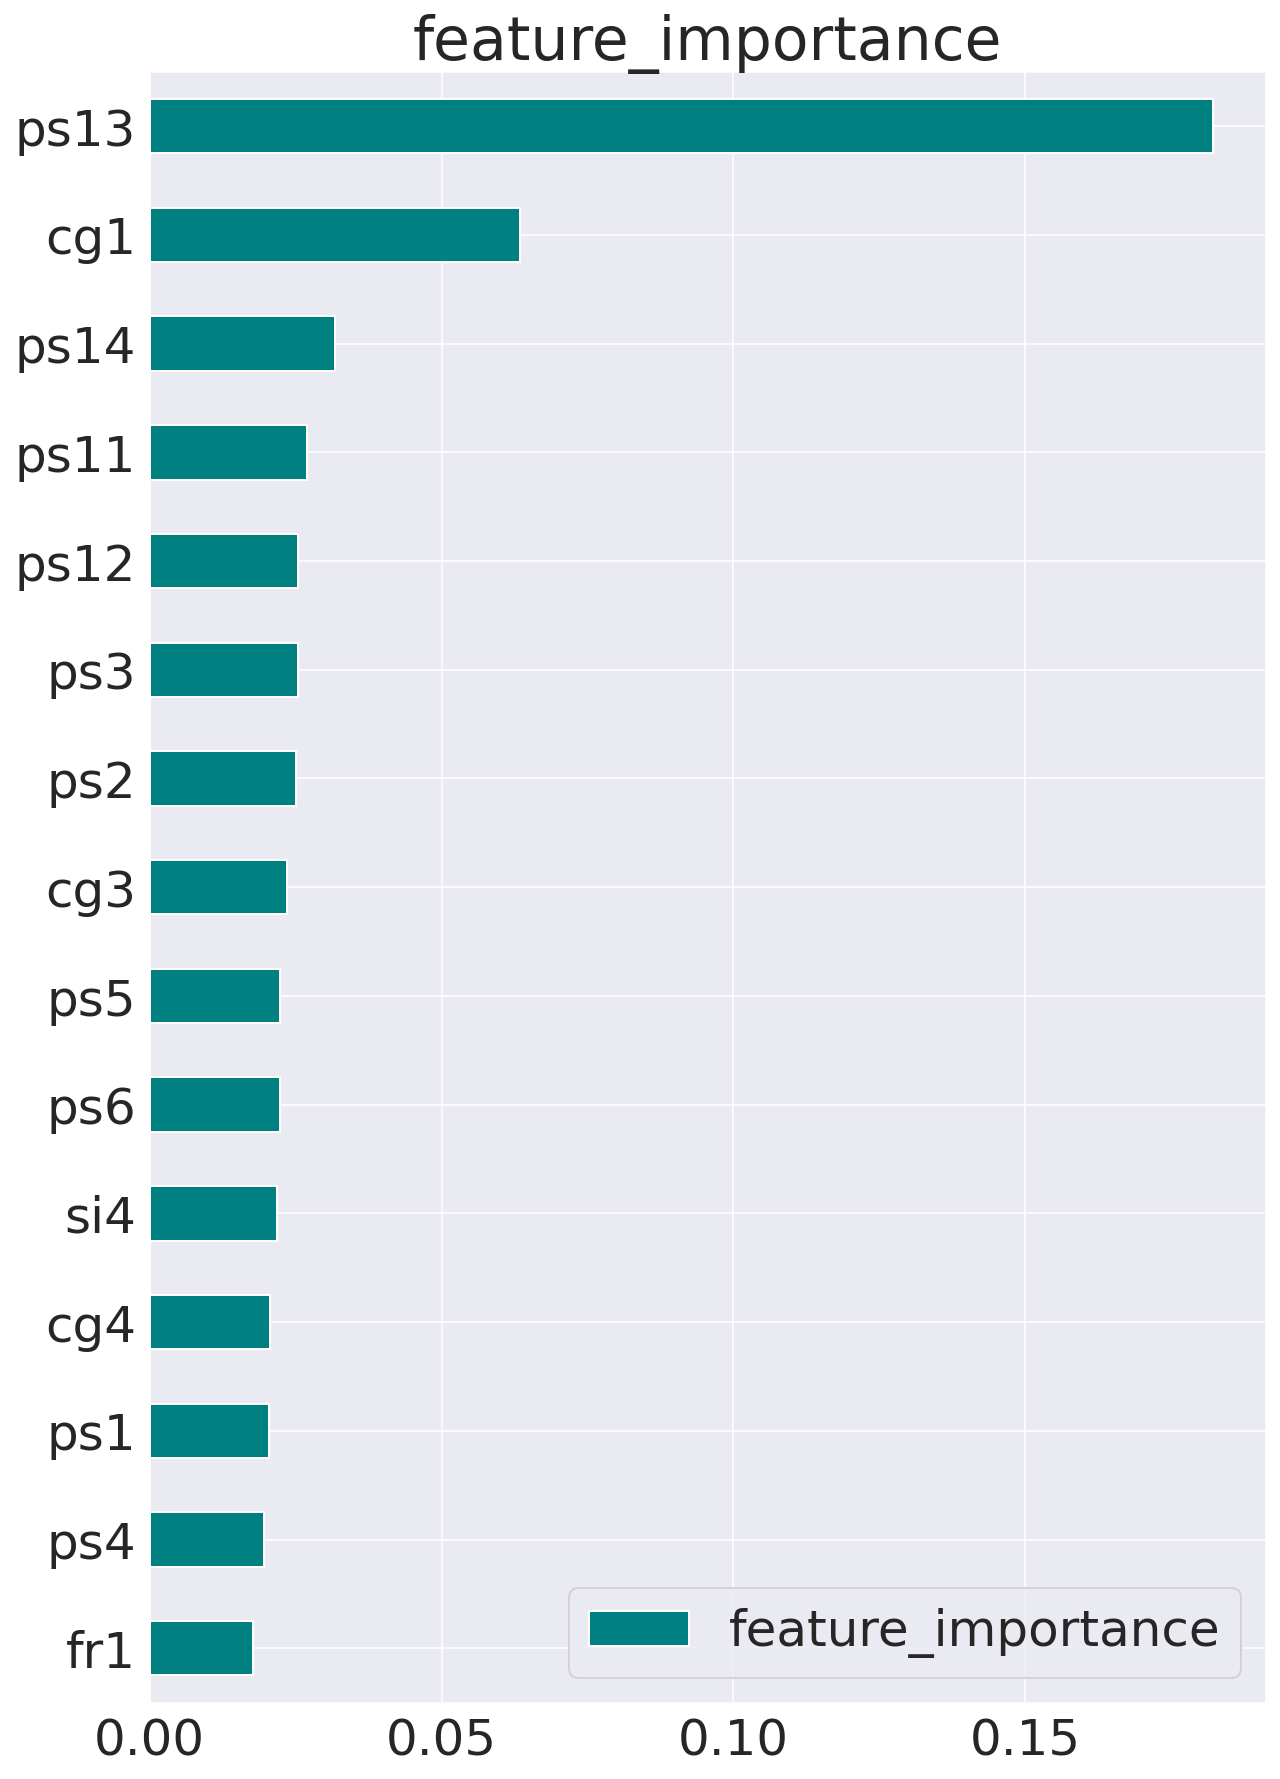

In [127]:
bar_width = 0.35
plt.rc("font",family="Malgun Gothic",size=25)
plt.rc("axes",unicode_minus=False)
b.plot.barh(align='center',color = 'teal',figsize = (10,15))
plt.title('feature_importance', fontsize= 30)

### RF voting

In [35]:
rf_ets = []    
for i in range(10):
    rf = RandomForestClassifier(random_state=217+i,**rf_random.best_params_)
    rf_ets.append(('rf{}'.format(i), rf))   

In [36]:
vc3 = VotingClassifier(rf_ets, voting='soft')    
#_ = vc3.fit(dat1,target,sample_weight=y_train_weights)    
_ = vc3.fit(X_train,y_train)    

In [37]:
rf_clf_final = vc3.estimators_[0]

In [38]:
rf_global_score = f1_score(y_val, rf_clf_final.predict(X_val), average='weighted')
vc3.voting = 'hard'
rf_global_score_hard = f1_score(y_val, vc3.predict(X_val),average='weighted')
vc3.voting = 'soft'
rf_global_score_soft = f1_score(y_val, vc3.predict(X_val), average='weighted')

In [39]:
# Validation score of a singl rf Classifier: 0.0868 여기서도 코딩의 오류가 보인듯..
print('Validation score of a singl rf Classifier: {:.4f}'.format(rf_global_score))
print('Validation score of a VotingClassifier on 3 rf with soft voting strategy: {:.4f}'.format(rf_global_score_soft))
print('Validation score of a VotingClassifier on 3 rf with hard voting strategy: {:.4f}'.format(rf_global_score_hard))

Validation score of a singl rf Classifier: 0.0868
Validation score of a VotingClassifier on 3 rf with soft voting strategy: 0.7282
Validation score of a VotingClassifier on 3 rf with hard voting strategy: 0.7269


f1  0.7282257384145149
              precision    recall  f1-score   support

           1       0.75      0.49      0.60       243
           2       0.70      0.79      0.74      1019
           3       0.78      0.78      0.78      1156
           4       0.54      0.16      0.24        83

    accuracy                           0.74      2501
   macro avg       0.69      0.56      0.59      2501
weighted avg       0.73      0.74      0.73      2501



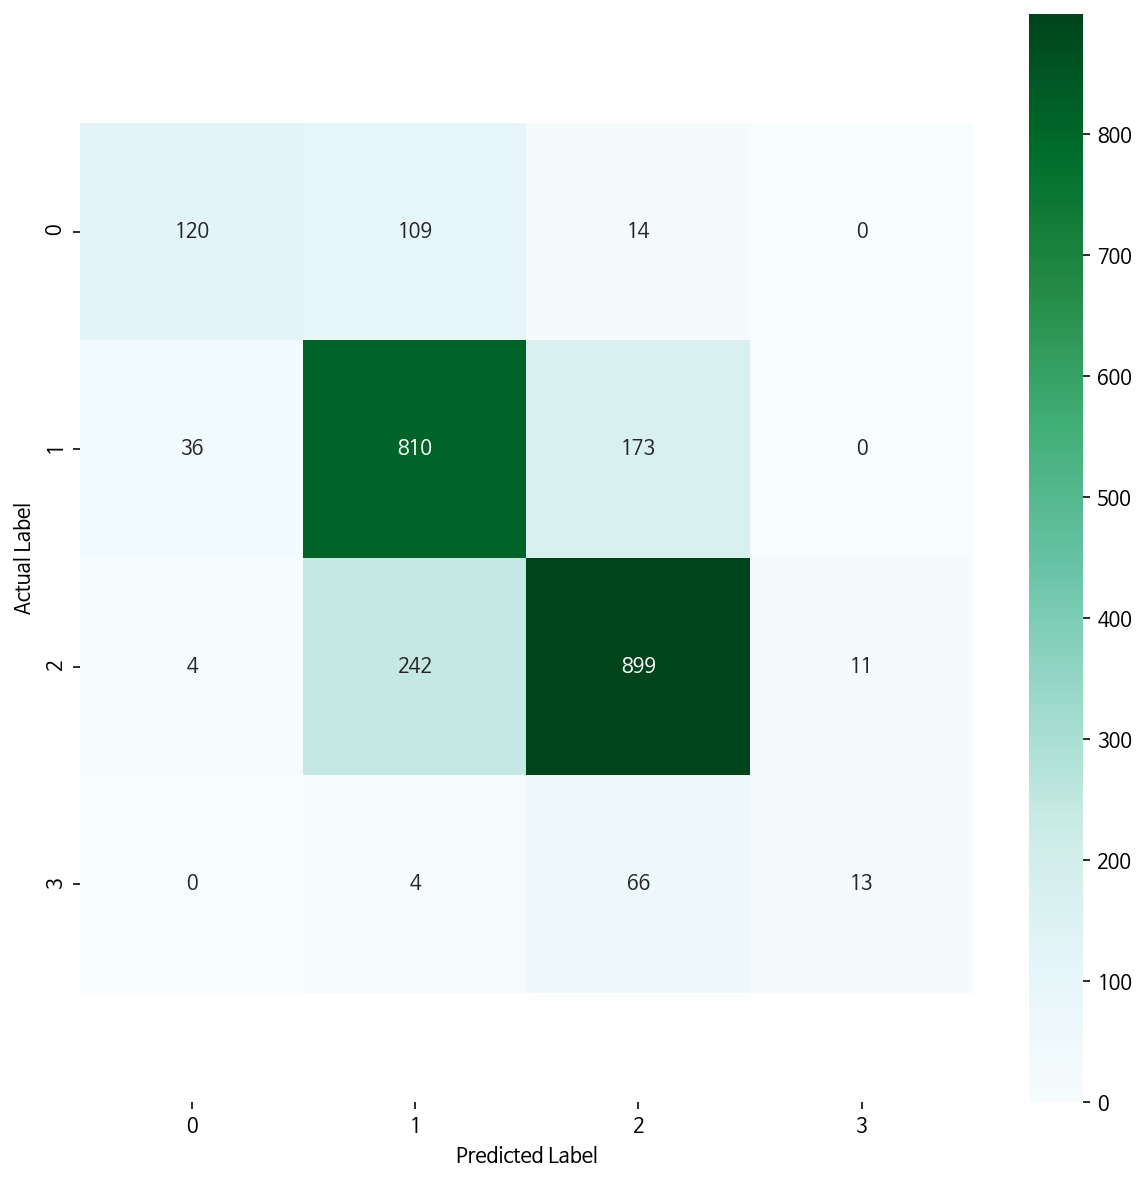

In [40]:
cnf_matrix_vrf = confusion_matrix(y_val, vc3.predict(X_val))
g = sns.heatmap(pd.DataFrame(cnf_matrix_vrf), annot=True, cmap="BuGn", fmt='g')
buttom , top = g.get_ylim()
g.set_ylim(buttom+0.5, top-0.5)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print('f1 ',f1_score(y_true=y_val, y_pred=vc3.predict(X_val), average='weighted'))
print(classification_report(y_val, vc3.predict(X_val)))

In [41]:
joblib.dump(vc3,'rf_voting.pkl')

['rf_voting.pkl']

### e.XGBOOST <a id="four-e"></a>

f1  0.7269376075718236
              precision    recall  f1-score   support

           1       0.70      0.56      0.62       243
           2       0.71      0.76      0.73      1019
           3       0.77      0.78      0.77      1156
           4       0.50      0.24      0.33        83

    accuracy                           0.73      2501
   macro avg       0.67      0.58      0.61      2501
weighted avg       0.73      0.73      0.73      2501



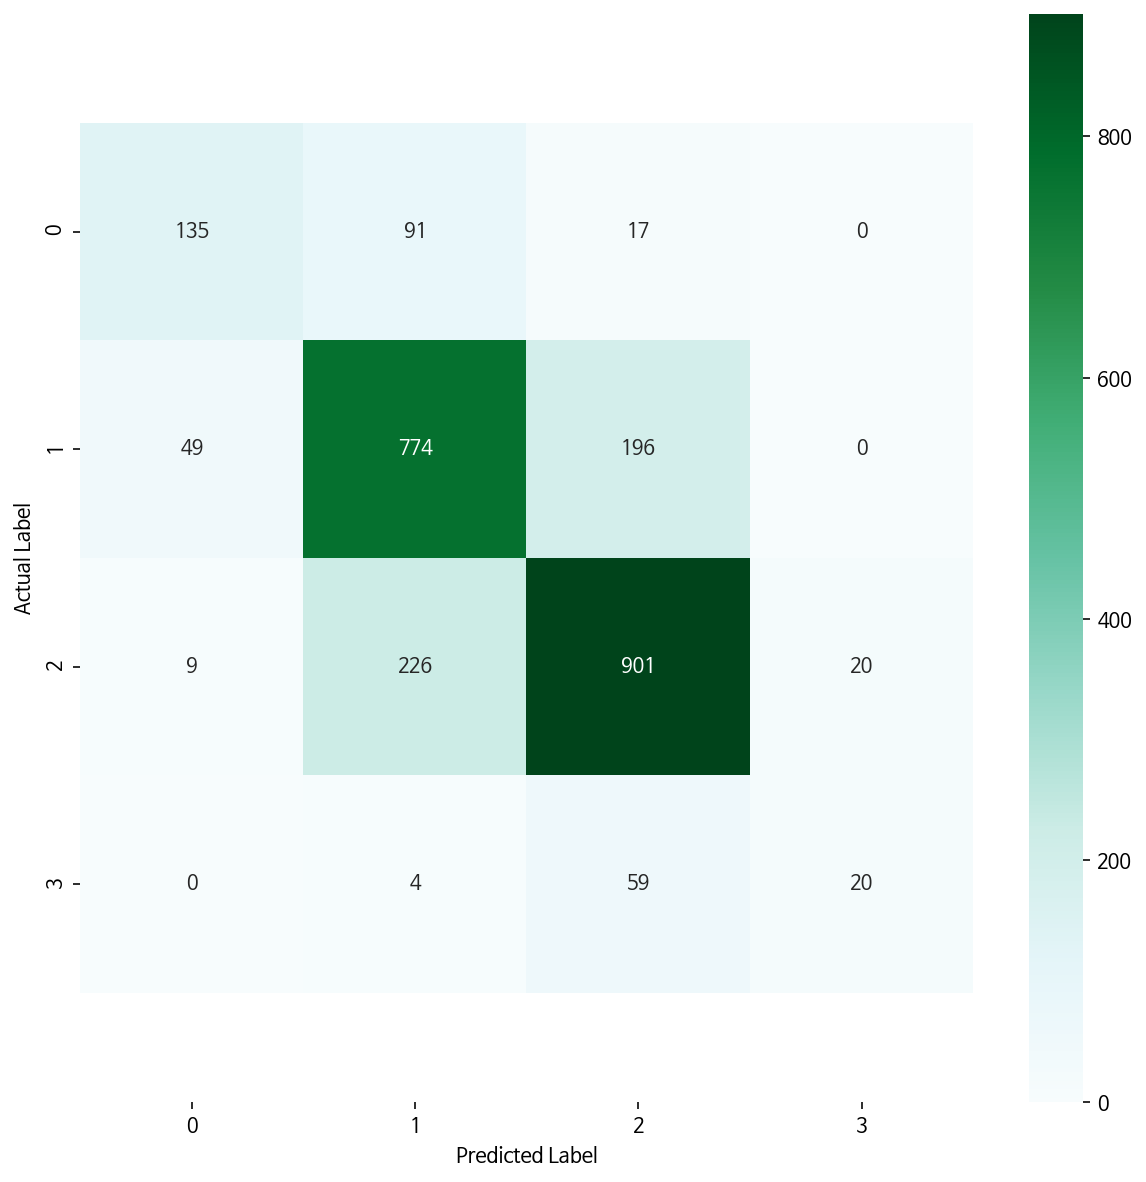

In [42]:
#xgboost 모델 생성 후 학습
#모델 생성
model = xgb.XGBClassifier(n_estimators = 5000, max_depth = 30, cv= kfold,learning_rate = 0.01,random_state = 16)
#모델 학습
model.fit(X_train, y_train) 
#예측 분류
y_pred = model.predict(X_val)

#오분류표 코드 
cnf_matrix = confusion_matrix(y_val, y_pred)
g = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuGn", fmt='g')
buttom , top = g.get_ylim()
g.set_ylim(buttom+0.5, top-0.5)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

#f1 score와 오분류표 보여줌
print('f1 ',f1_score(y_true=y_val, y_pred=y_pred, average='weighted')) #불균현 문제를 위하 가중치 weighted 
print(classification_report(y_val, y_pred))

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


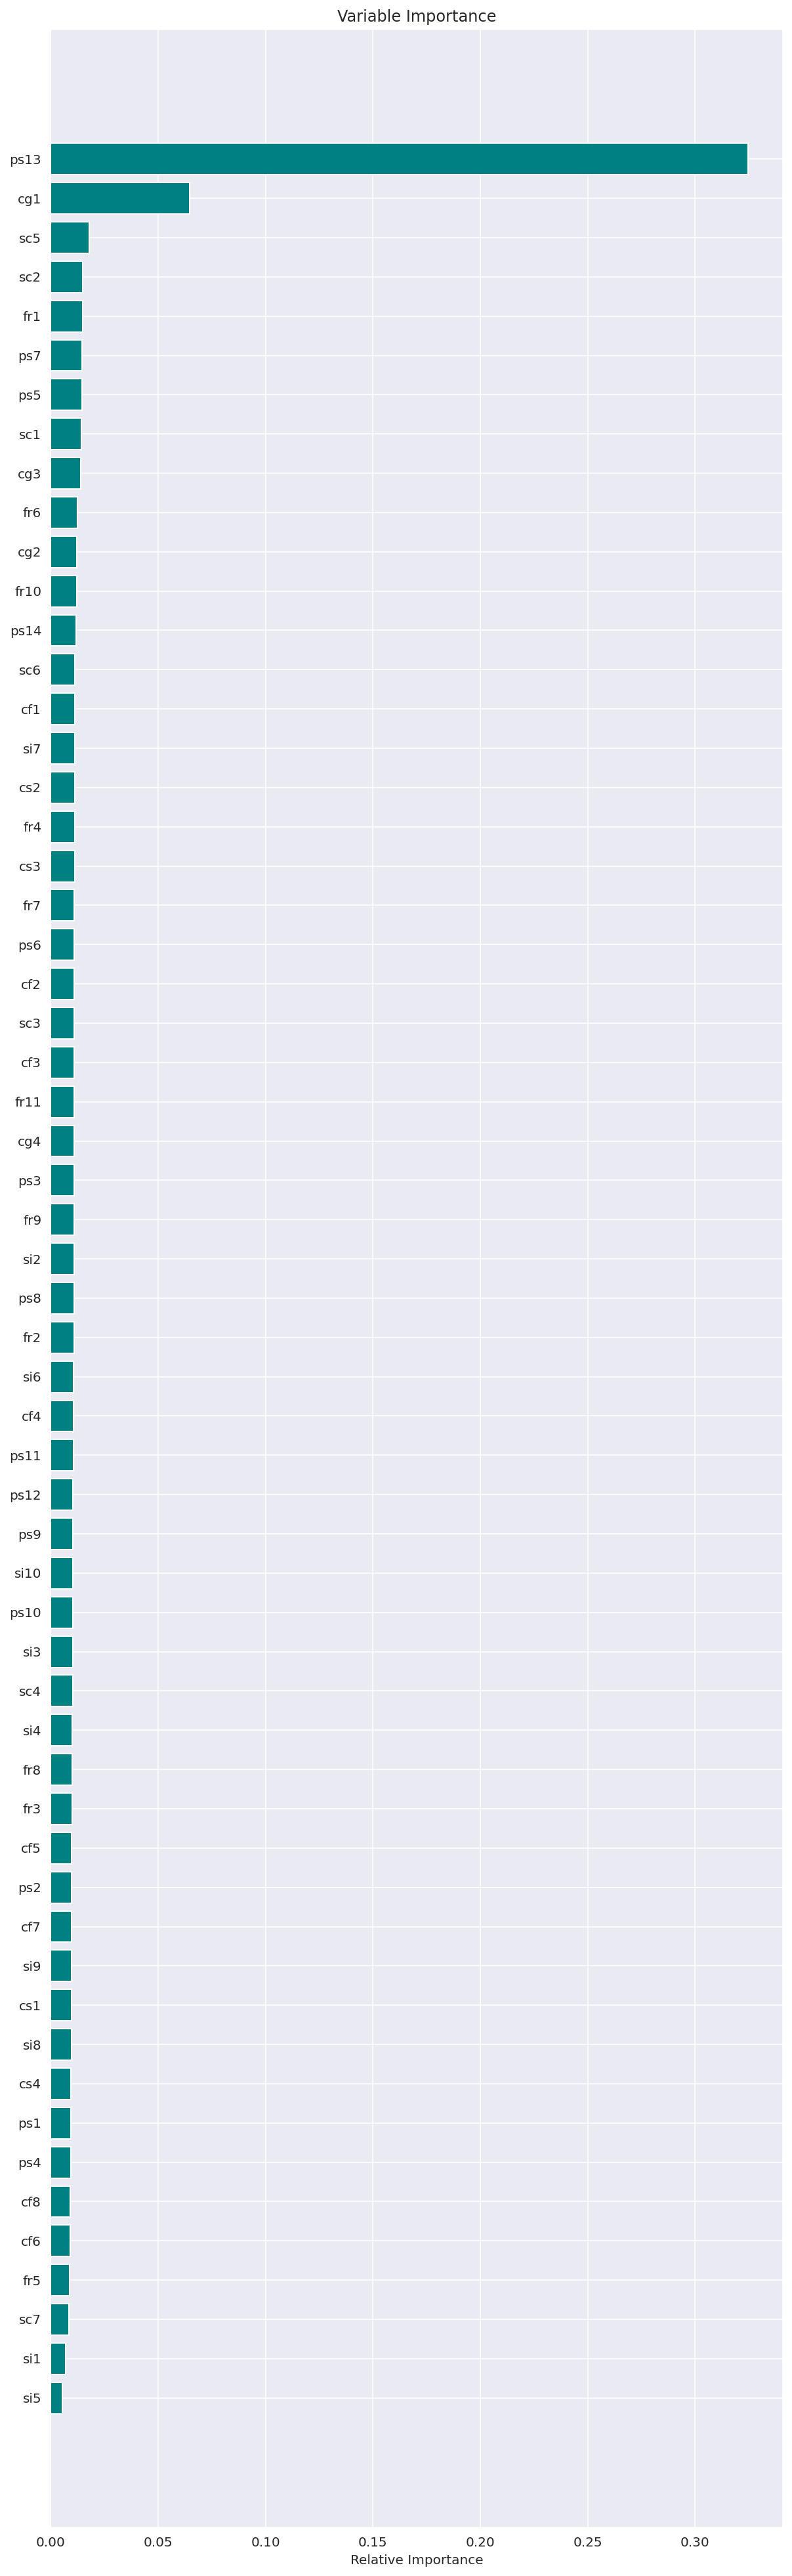

In [43]:
#변수 중요도 코드
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    sns.set_style('darkgrid')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    #feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.rc("font",family="Malgun Gothic")
    plt.rc("axes",unicode_minus=False)
    
    plt.barh(pos, feature_importance[sorted_idx], align='center',color = 'teal' )
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

plot_feature_importance(model, X_train, (10, 35))

In [44]:
# 시각화를 위한 중요도(역순으로 표기됨)
feature_importance = model.feature_importances_
a = pd.Series(feature_importance,X_train.columns).sort_values(ascending=True)
b = pd.DataFrame(a, columns= ['feature_importance']).tail(15)
b

,feature_importance
cf1,0.011333
sc6,0.011374
ps14,0.011803
fr10,0.012075
cg2,0.012196
fr6,0.012509
cg3,0.014063
sc1,0.014247
ps5,0.014589
ps7,0.014589


Text(0.5, 1.0, 'feature_importance')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


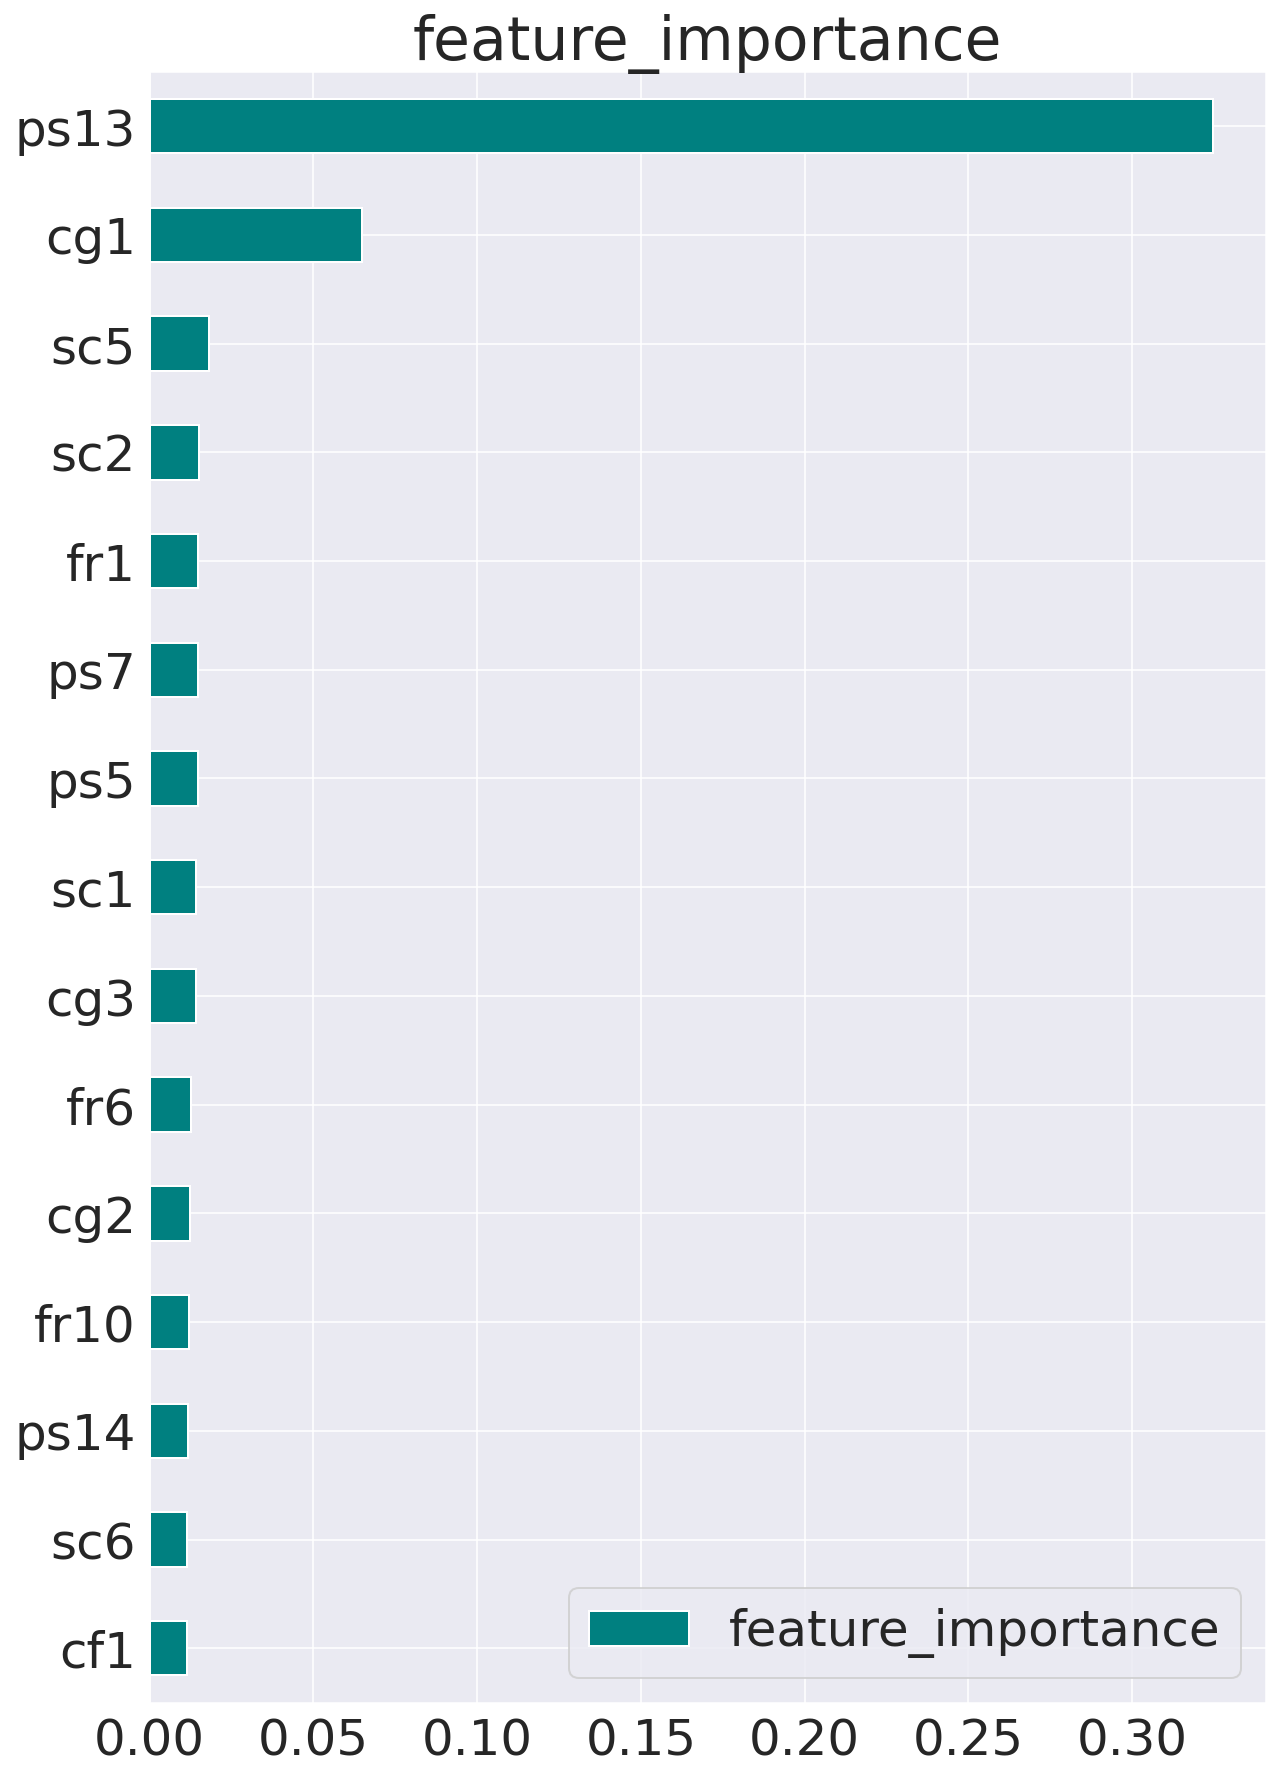

In [45]:
bar_width = 0.35
plt.rc("font",family="Malgun Gothic",size=25)
plt.rc("axes",unicode_minus=False)
b.plot.barh(align='center',color = 'teal',figsize = (10,15))
plt.title('feature_importance', fontsize= 30)

In [62]:
!pip install eli5

     |████████████████████████████████| 112kB 5.4MB/s 


In [63]:
import eli5 
from eli5.sklearn import PermutationImportance

In [64]:
perm = PermutationImportance(model, scoring = "f1_weighted",random_state = 42).fit(X_train, y_train)
eli5.show_weights(perm, top = 15, feature_names = X_train.columns.tolist())

Weight,Feature
0.3453 ± 0.0051,ps13
0.0707 ± 0.0039,cg1
0.0040 ± 0.0011,ps3
0.0036 ± 0.0011,ps7
0.0032 ± 0.0010,ps14
0.0031 ± 0.0007,cg3
0.0029 ± 0.0009,ps11
0.0026 ± 0.0009,fr1
0.0016 ± 0.0006,cg2
0.0015 ± 0.0005,cf8


In [65]:
node_params = {'shape': 'box',
              'style':'filled, rounded',
              'fillcolor': 'LightBlue'}
leaf_params = {'shape':'box',
              'style':'filled',
              'fillcolor':'GreenYellow'}

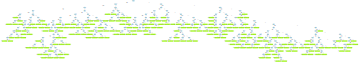

In [66]:
# 가지치기 사진이 짤린듯..
xgb.to_graphviz(model, num_trees=4, size='5,10',
               condition_node_params=node_params,
               leaf_node_params=leaf_params)

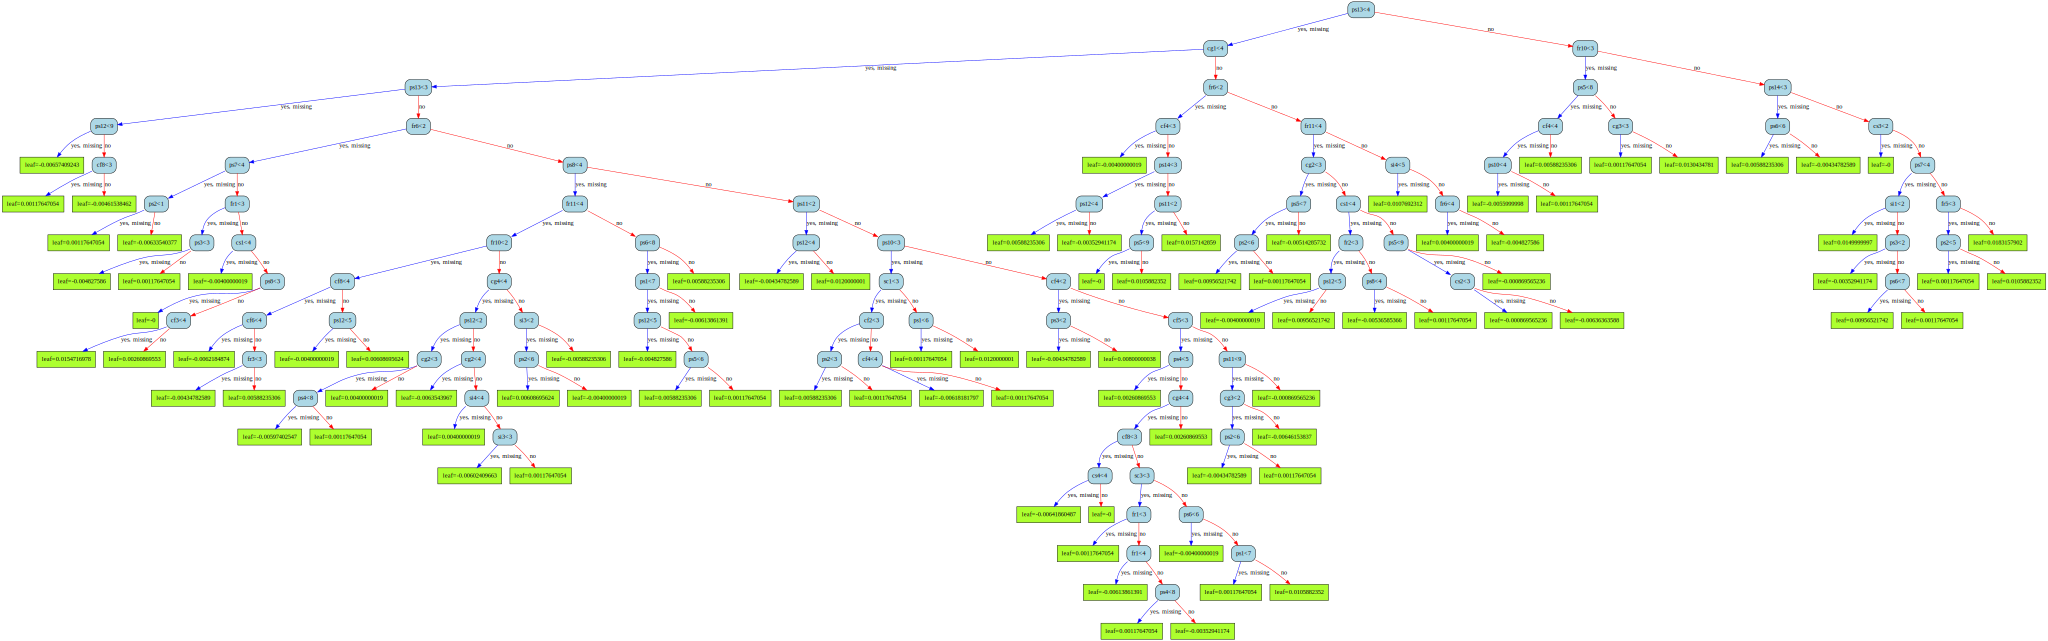

In [72]:
# 가지치기 사진이 짤린듯 
xgb.to_graphviz(model, num_trees=3, size='35,50',
               condition_node_params=node_params,
               leaf_node_params=leaf_params)

In [46]:
xgb_clf = xgb.XGBClassifier(eval_metric = ["merror", "map", "auc"],silent=0 ,objective = "multi:softmax",random_state=16)
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 1, 2],
               "max_depth": range(1,50),
               "colsample_bytree": [0.3, 0.8, 1.0],
               "colsample_bylevel" : [0.8,0.85,0.9],
               "subsample": [0.8,0.85,0.9],
               'num_class': [1,4,8],
               "reg_lambda": [0, 0.5, 1],
               "eta" : [0.1,0.01],
               "min_child_weight": [1, 3, 5],
               "n_estimators": range(500,1000)}

In [47]:
# 학습 완료 시간 147분
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = 'f1_weighted',
                             cv = kfold, verbose = 3, random_state = 16)
model_xgboost = xgb_rscv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] subsample=0.8, reg_lambda=1, num_class=8, n_estimators=659, min_child_weight=3, max_depth=7, learning_rate=0.001, gamma=1, eta=0.01, colsample_bytree=1.0, colsample_bylevel=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, reg_lambda=1, num_class=8, n_estimators=659, min_child_weight=3, max_depth=7, learning_rate=0.001, gamma=1, eta=0.01, colsample_bytree=1.0, colsample_bylevel=0.8, score=0.720, total=  47.3s
[CV] subsample=0.8, reg_lambda=1, num_class=8, n_estimators=659, min_child_weight=3, max_depth=7, learning_rate=0.001, gamma=1, eta=0.01, colsample_bytree=1.0, colsample_bylevel=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   47.3s remaining:    0.0s


[CV]  subsample=0.8, reg_lambda=1, num_class=8, n_estimators=659, min_child_weight=3, max_depth=7, learning_rate=0.001, gamma=1, eta=0.01, colsample_bytree=1.0, colsample_bylevel=0.8, score=0.723, total=  47.7s
[CV] subsample=0.8, reg_lambda=1, num_class=8, n_estimators=659, min_child_weight=3, max_depth=7, learning_rate=0.001, gamma=1, eta=0.01, colsample_bytree=1.0, colsample_bylevel=0.8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


[CV]  subsample=0.8, reg_lambda=1, num_class=8, n_estimators=659, min_child_weight=3, max_depth=7, learning_rate=0.001, gamma=1, eta=0.01, colsample_bytree=1.0, colsample_bylevel=0.8, score=0.764, total=  47.4s
[CV] subsample=0.8, reg_lambda=1, num_class=8, n_estimators=659, min_child_weight=3, max_depth=7, learning_rate=0.001, gamma=1, eta=0.01, colsample_bytree=1.0, colsample_bylevel=0.8 
[CV]  subsample=0.8, reg_lambda=1, num_class=8, n_estimators=659, min_child_weight=3, max_depth=7, learning_rate=0.001, gamma=1, eta=0.01, colsample_bytree=1.0, colsample_bylevel=0.8, score=0.732, total=  50.4s
[CV] subsample=0.8, reg_lambda=1, num_class=8, n_estimators=659, min_child_weight=3, max_depth=7, learning_rate=0.001, gamma=1, eta=0.01, colsample_bytree=1.0, colsample_bylevel=0.8 
[CV]  subsample=0.8, reg_lambda=1, num_class=8, n_estimators=659, min_child_weight=3, max_depth=7, learning_rate=0.001, gamma=1, eta=0.01, colsample_bytree=1.0, colsample_bylevel=0.8, score=0.704, total=  47.5s
[

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 147.1min finished


In [48]:
# 최고의 파라미터
best_param = model_xgboost.best_params_
best_param

{'colsample_bylevel': 0.9,
 'colsample_bytree': 0.8,
 'eta': 0.1,
 'gamma': 0.01,
 'learning_rate': 0.1,
 'max_depth': 43,
 'min_child_weight': 1,
 'n_estimators': 839,
 'num_class': 8,
 'reg_lambda': 1,
 'subsample': 0.9}

In [49]:
model_xgb = xgb.XGBClassifier(**best_param)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=43,
              min_child_weight=1, missing=None, n_estimators=839, n_jobs=1,
              nthread=None, num_class=8, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.9, verbosity=1)

In [50]:
Predicted_xgb= model_xgb.predict(X_val)
test_xgb_f1 = cross_val_score(model_xgb, X_train, y_train, cv=kfold, scoring='f1_weighted').mean()

In [51]:
import joblib
joblib.dump(model_xgb,'xgb.pkl')

['xgb.pkl']

In [52]:
four_f1(test_xgb_f1,Predicted_xgb)

F1 Cross_validate 0.7330905975933268
F1 Macro: 0.6110651700161951
F1 Micro: 0.7337065173930428
F1 Weighted: 0.7288523471957101

Matrix of confusion


array([[143,  86,  14,   0],
       [ 55, 771, 193,   0],
       [ 11, 224, 903,  18],
       [  0,   4,  61,  18]])

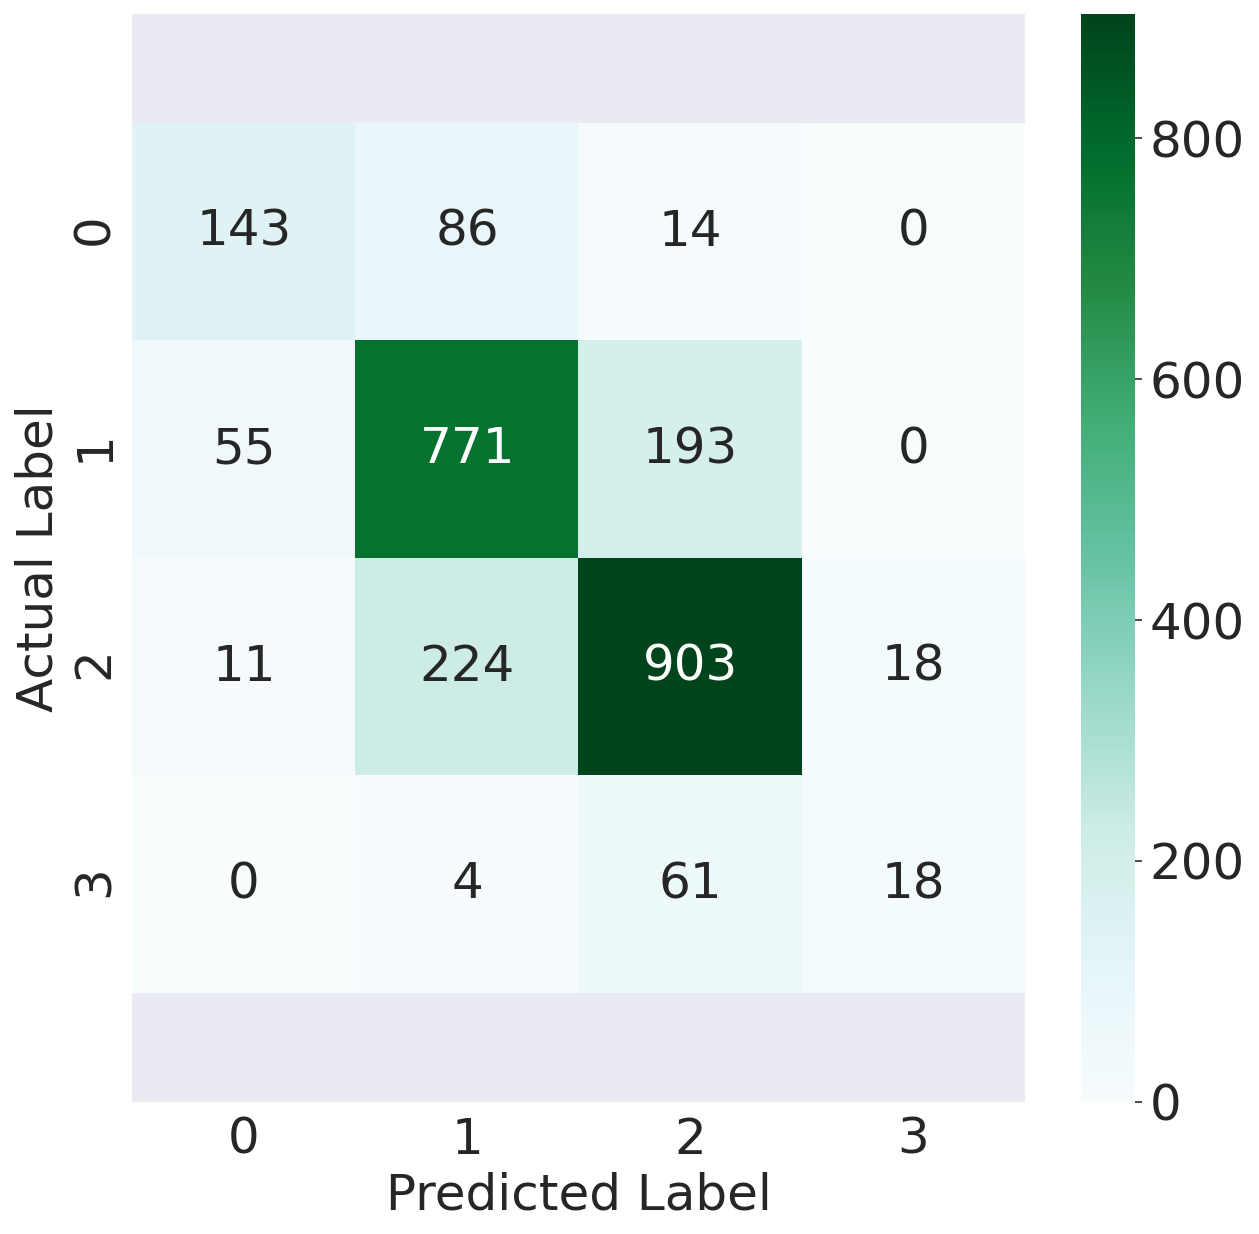

In [53]:
cnf_matrix_model(Predicted_xgb)

### xgboost voting

In [54]:
y_train_weights = class_weight.compute_sample_weight('balanced', y_train, indices=None)
fit_params={'verbose': False}
fit_params['verbose'] = 50

In [55]:
clfs = []
for i in range(10):
    clf = xgb.XGBClassifier(random_state=217+i, n_jobs=4, **best_param)
    
    clfs.append(('xgb{}'.format(i), clf))

In [56]:
vc = VotingClassifier(clfs, voting='soft')
del(clfs)

In [57]:
_ = vc.fit(X_train, y_train, sample_weight=y_train_weights)

clf_final = vc.estimators_[0]

In [58]:
# Validation score of a single XGB Classifier: 0.1010 코딩의 오류로 보임
global_score = f1_score(y_val, clf_final.predict(X_val), average='weighted')
vc.voting = 'hard'
global_score_hard = f1_score(y_val, vc.predict(X_val), average='weighted')
vc.voting = 'soft'
global_score_soft = f1_score(y_val, vc.predict(X_val),average='weighted')
print('Validation score of a single XGB Classifier: {:.4f}'.format(global_score))
print('Validation score of a VotingClassifier on 3 XGB with hard voting strategy: {:.4f}'.format(global_score_hard))
print('Validation score of a VotingClassifier on 3 XGB with soft voting strategy: {:.4f}'.format(global_score_soft))

Validation score of a single XGB Classifier: 0.1010
Validation score of a VotingClassifier on 3 XGB with hard voting strategy: 0.7308
Validation score of a VotingClassifier on 3 XGB with soft voting strategy: 0.7315


f1  0.7315165736759734
              precision    recall  f1-score   support

           1       0.66      0.60      0.63       243
           2       0.72      0.75      0.73      1019
           3       0.77      0.78      0.78      1156
           4       0.51      0.28      0.36        83

    accuracy                           0.73      2501
   macro avg       0.67      0.60      0.63      2501
weighted avg       0.73      0.73      0.73      2501



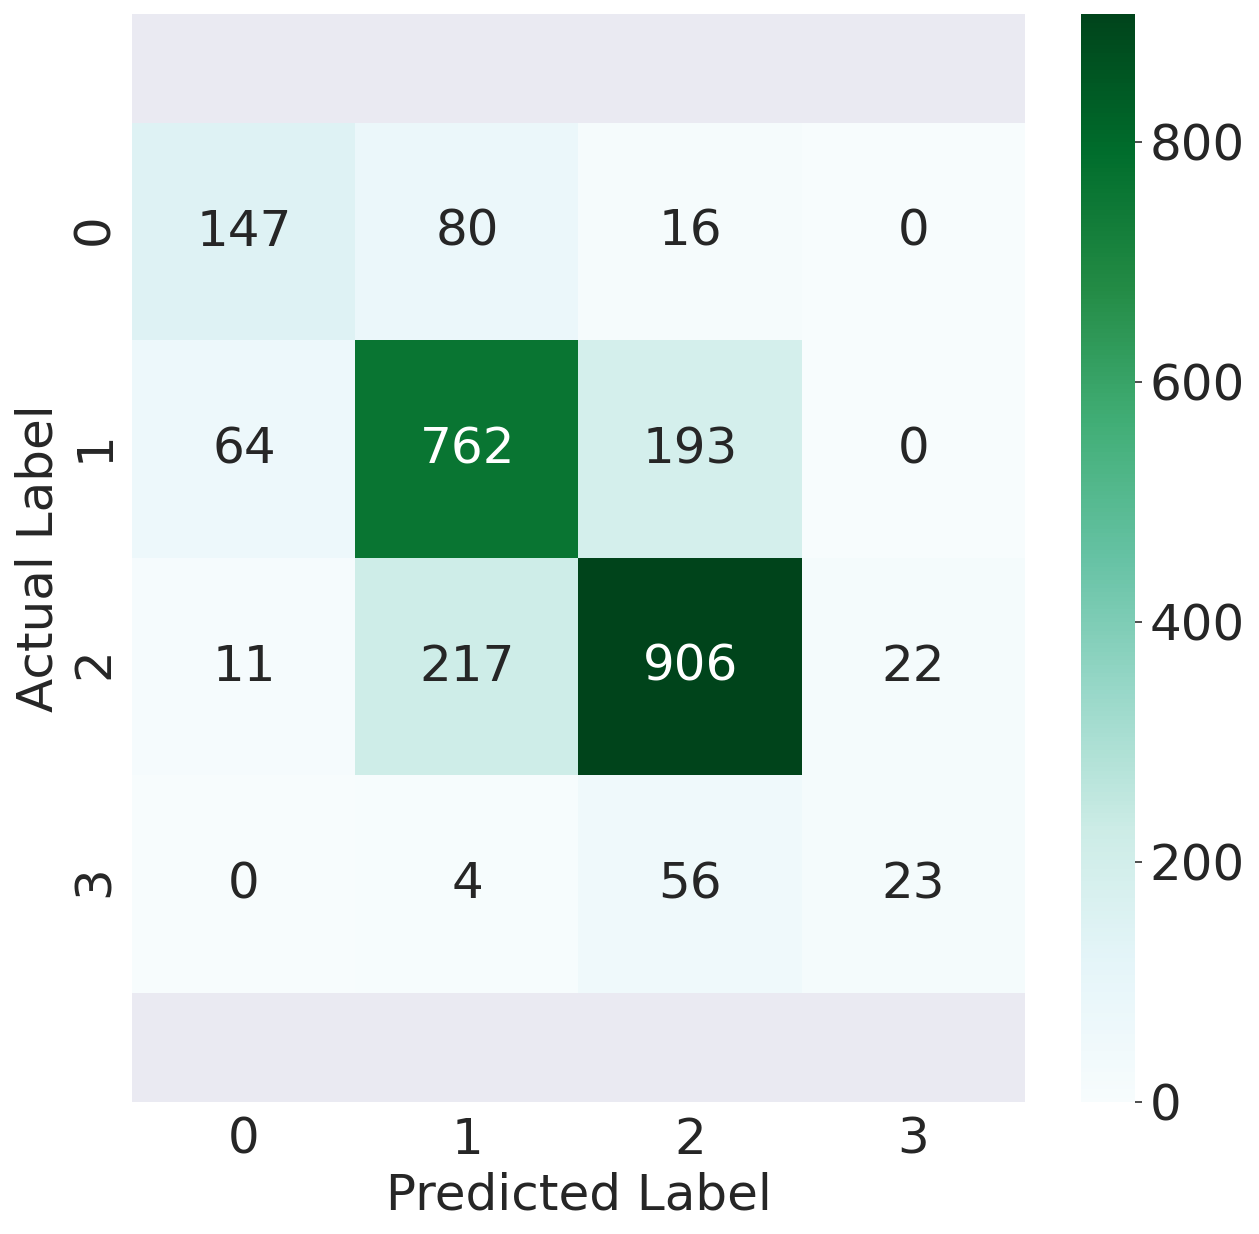

In [59]:
cnf_matrix = confusion_matrix(y_val, vc.predict(X_val))
g = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuGn", fmt='g')
buttom , top = g.get_ylim()
g.set_ylim(buttom+0.5, top-0.5)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print('f1 ',f1_score(y_true=y_val, y_pred=vc.predict(X_val), average='weighted'))
print(classification_report(y_val, vc.predict(X_val)))

In [88]:
import joblib
joblib.dump(vc,'xgb_voting.pkl')

['xgb_voting.pkl']

### f.앙상블 <a id="four-f"></a>

In [98]:
# xgboost의 f1스코어가 제일 높게나옴(lgb, rf)
print('f1 ',f1_score(y_true=y_val, y_pred=vc.predict(X_val), average='weighted'))
print('f1 ',f1_score(y_true=y_val, y_pred=vc2.predict(X_val), average='weighted'))
print('f1 ',f1_score(y_true=y_val, y_pred=vc3.predict(X_val), average='weighted'))

f1  0.7315165736759734
f1  0.7175555514666233
f1  0.7282257384145149


In [93]:
test_XGB = pd.Series(vc.predict(X_val), name="XGB")
test_LGB = pd.Series(vc2.predict(X_val), name="LGB")
test_RFC = pd.Series(vc3.predict(X_val), name="RFC")

ensemble_results = pd.concat([test_XGB,test_LGB,test_RFC],axis=1)

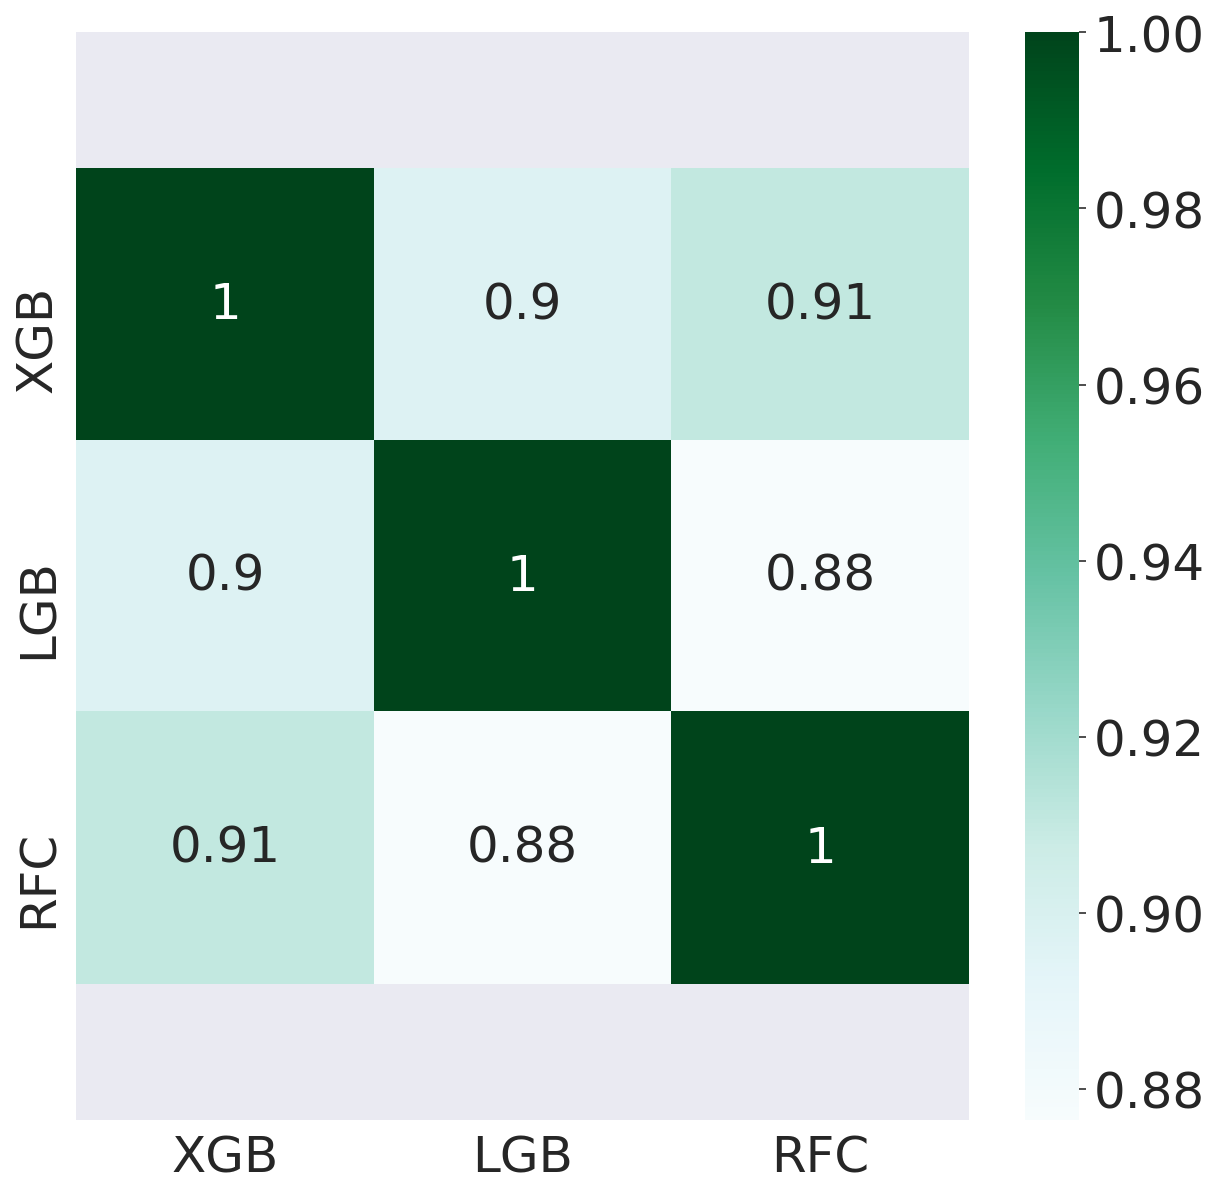

In [94]:
# 세가지 모델의 타겟 예측모델을 보니 RF와 XGB가 제일 높은 상관관계를 보임 
g= sns.heatmap(ensemble_results.corr(),annot=True,cmap='BuGn')
buttom , top = g.get_ylim()
g.set_ylim(buttom+0.5, top-0.5)
plt.show()

In [139]:
def combine_voters(data, weights=[0.5, 0.5]):
    # do soft voting with both classifiers
    vc.voting = 'soft'
    vc1_probs = vc.predict_proba(data)
    vc3.voting="soft"
    vc3_probs = vc3.predict_proba(data) 
    
    final_vote = (vc1_probs * weights[0]) + (vc3_probs * weights[1])
    predictions = np.argmax(final_vote, axis=1)
    
    return predictions

In [145]:
#1) Max Voting
# 최종값 = 여러 분류기 중 가장 많은 분류기가 추출한 결과 값(3가지 모델의 pred 최빈값)
from scipy.stats import mode

pred1=vc.predict(X_val)
pred2=vc2.predict(X_val)
pred3=vc3.predict(X_val)

final_pred = np.array([])

for i in range(0,len(X_val)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))
    #각 모델의 예측값 중 최빈값(mode())을 배열에 저장

In [156]:
# 결과해석 다시 확인해봐야할듯
result = pd.DataFrame({
    "tr":  final_pred
})
result

,tr
0,3.0
1,3.0
2,3.0
3,3.0
4,2.0
...,...
4997,3.0
4998,3.0
4999,2.0
5000,1.0


In [148]:
# VotingClassifier 투표기반으로 앙상블 할 수 있었지만 컴퓨터가 터져서 못함..

from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
# lr=logistic regression, dt=decision tree

model.fit(x_train,y_train)
model.score(x_test,y_test)


5002

## 결과

- 아쉬운점
- 1. 원핫인코딩관련

설문문항은 카테고리 변수여서 범주형 변수로 바꾼다음에 원핫인코딩을 하였다면 조금더 학습이 잘되었을거라 판단 / 현재는 int형으로 들어가있는것으로 보임 이럴때 컴퓨터가 학습을 하면 1,2,3,4에서 3,4에 조금더 가중치를 주는? 그런 말이 있다는데 a/b테스트를 해봐야 할거같다.

- 2. 모델링 과정에서 잔실수

모델링 결과가 가끔 잘못나올때가 있는데 이러한 모델을 한번 더 뜯어봐도 좋을거같다

- 3. kfold결과 

여러 모델의 점수가 비슷하게 나와서 로지스틱회귀모델을 하여 p-value 비교도 해보는것도 좋을듯?

- 4. 앙상블 관련

컴퓨터 서버 문제로 중간에 튕겨서 앙상블 모델을 제대로 만들어 보지 못했다. 전에 프로젝트에서는 predict_proba로 xgb에 0.8 곱하고 gbc에 0.2를 곱해서 결과값을 1,2,3,4로 딱 맞춰 분류하였지만 여기서는 코딩문제로 인해 그렇게 하였을때 점수가 이상하게 나왔다, 따라서 최빈값을 하거나 아니면 앙상블 학습을 하거나 여러 방법이 있어서 하면 좋을거같다! 

- 5. 검증 데이터 관련

14~19년을 7:3으로 나누어 7(train) 3(test) 20년을 test 데이터로 하여 검증을 하는것도 있겠지만 연구 목적과는 달라서 14~19년 / 20년 각각 7:3으로 train_test_split을 하였다. 이에 모델의 검증이 잘 되었는지 확인이 애매?